# Problem Statement

It is a Regression Problem,in which need to predict Price of each homes(Target Feature) With 79 explanatory variables describing almost every aspect of residential homes.on basis of these variable's trained Machine Learning model with almost every Machine Leaning algorithm and tried to predicted the right price of House which helps to lots of customers to buy their dream house.

![](house.jpeg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
import os
os.chdir("G:\\kaggle data set\\house-prices-advanced-regression-techniques")

# Load Train Dataset

In [2]:
train = pd.read_csv("train.csv")
train = train.drop(["Id"],axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# EDA

# Check Distribution of Target Feature

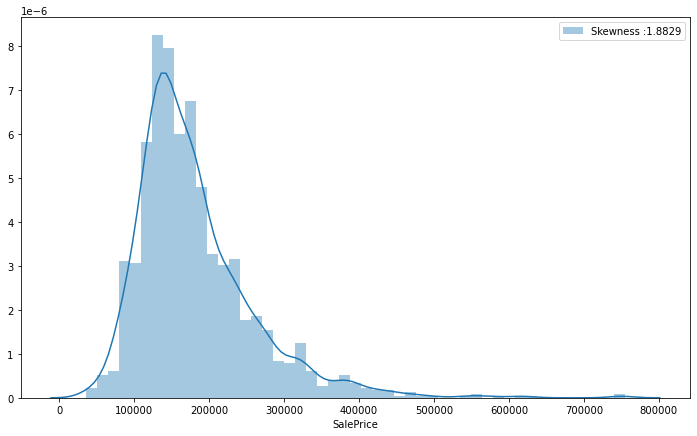

In [3]:
plt.figure(figsize=(12,7))
dist_target = sns.distplot(train["SalePrice"])
dist_target.legend(["Skewness :{:.4f}".format(train["SalePrice"].skew())])
plt.show()

In [4]:
# null values in train data for each columns:

nan_features = [features for features in train.columns if train[features].isnull().sum()>=1]
train[nan_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Percentage of null values in each NAN Columns
train[nan_features].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [6]:
# Featutes Information like(Dtype and Number of non null counts) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#All Numericals Features

numerical_features = train.select_dtypes(include=["float64","int64"])
numerical_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3         836   


In [8]:
#All categorical Features.

categorical_features = train.select_dtypes(include=["object"])
categorical_features

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [9]:
# Name of those feature's having Yearly Data.
year_feature_names = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
year_feature_names

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

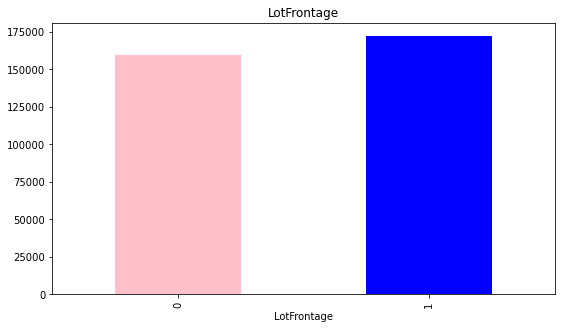

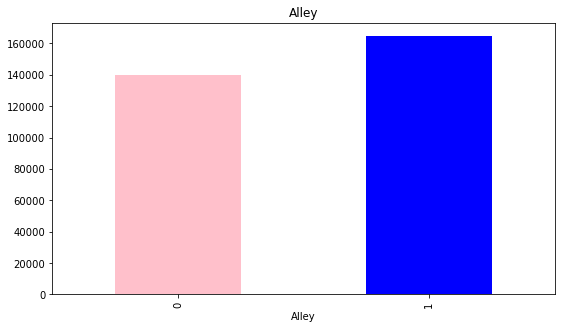

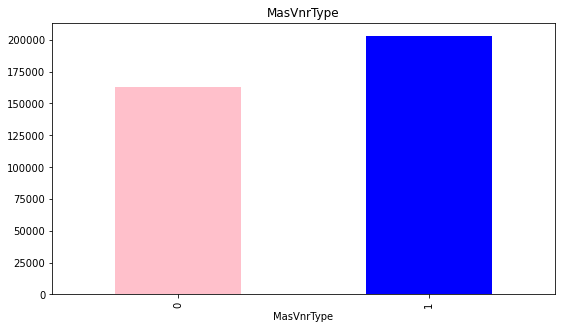

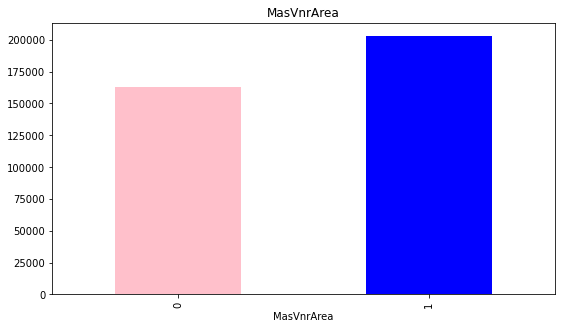

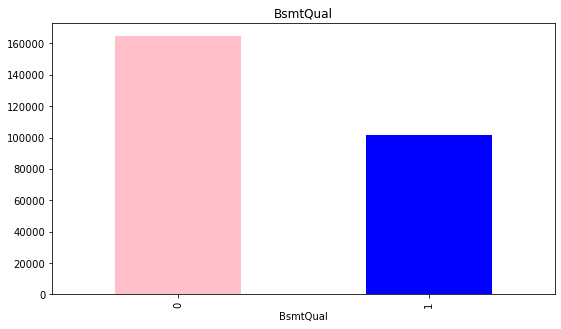

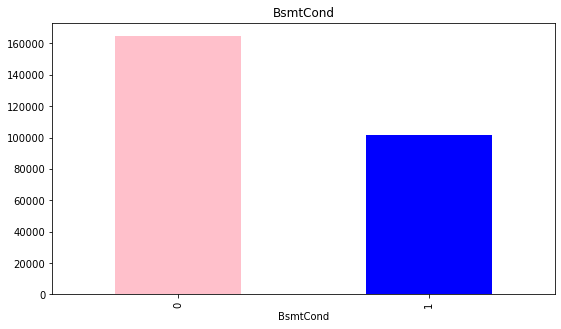

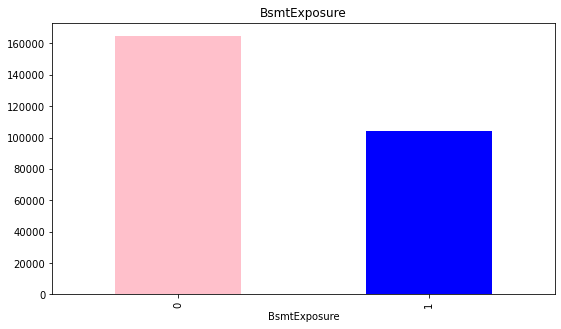

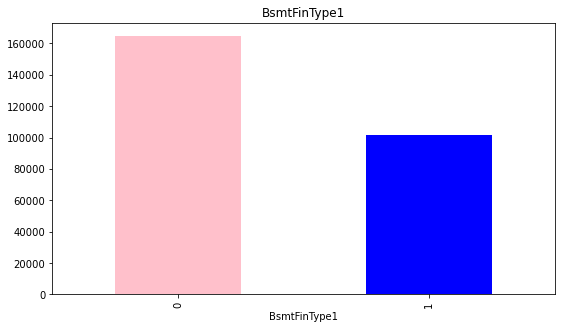

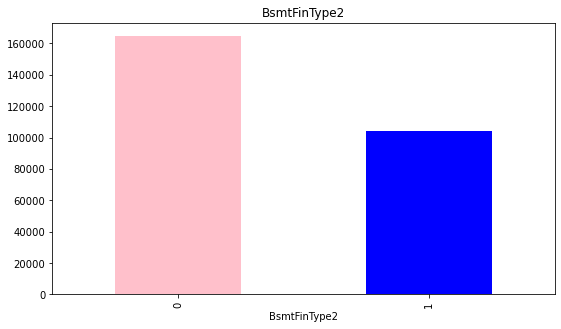

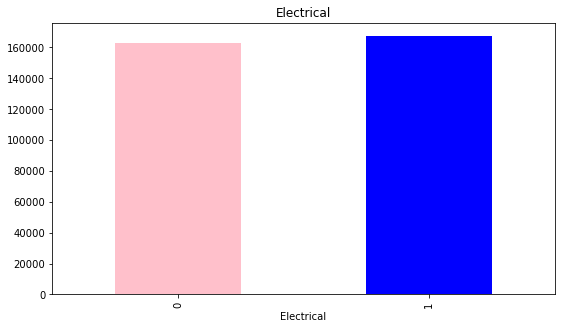

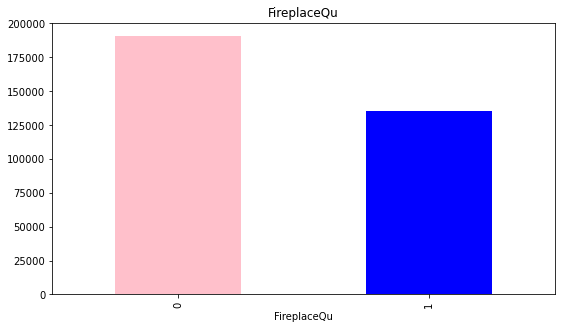

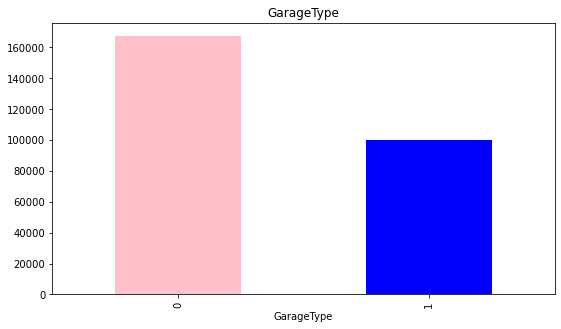

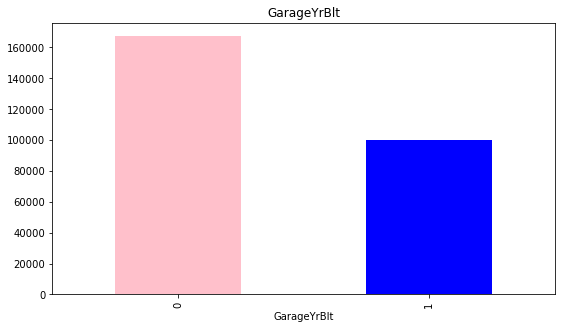

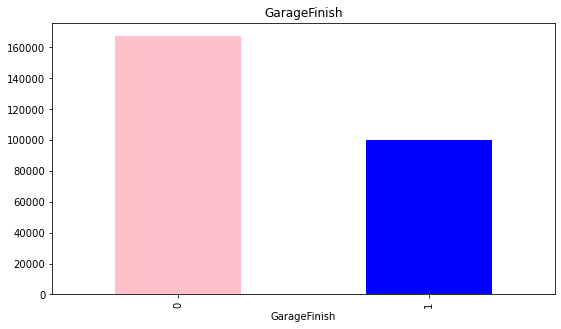

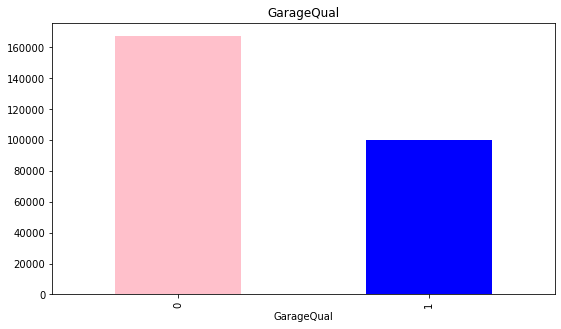

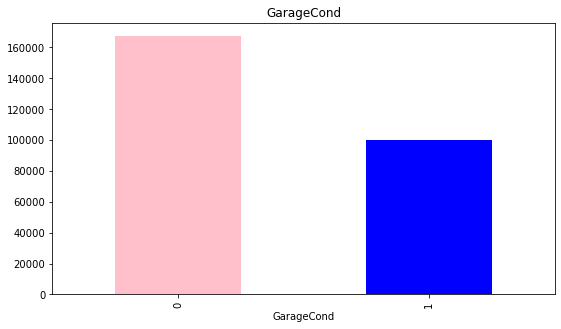

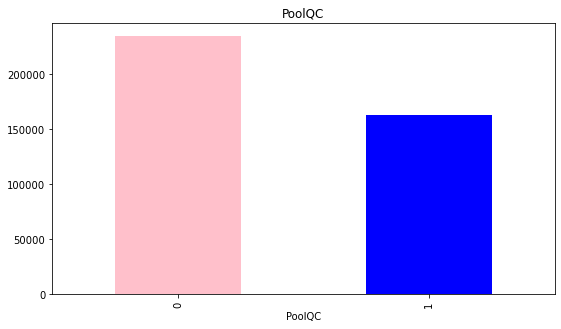

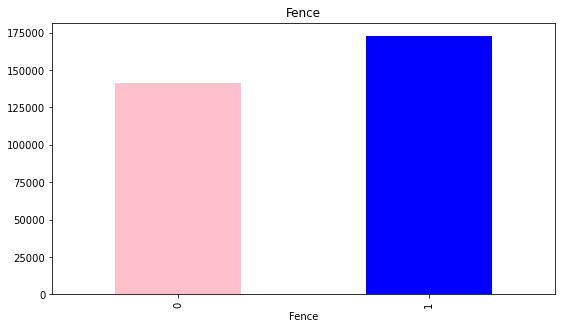

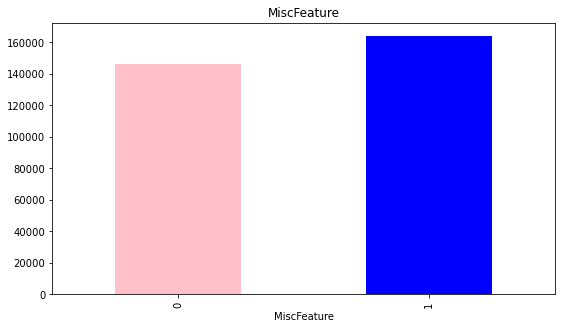

In [10]:
# Check NAN Values are important for Target Feature.

train_copy = train.copy()

for feature in nan_features:
    train_copy[feature] = np.where(train_copy[feature].isnull(),1,0)
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["pink","b"],figsize=(9,5))
    plt.title(feature)
    plt.show()

From Graph's it's Clearly visible that missing value has also Impact on Dependent variable,so we need to replace these nan value with something meaningfull.

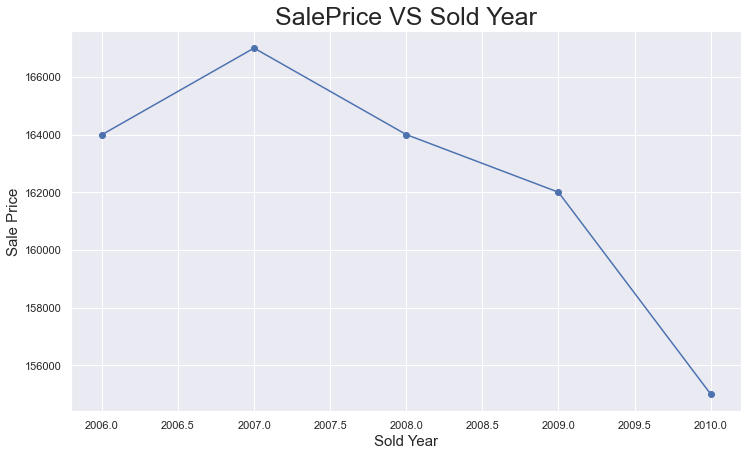

In [11]:
# Average SalePrice in Every Sold Year.

sns.set(style='darkgrid')
plt.figure(figsize=(12,7))
plt.plot(train_copy.groupby("YrSold")["SalePrice"].median(),marker="o")
plt.title("SalePrice VS Sold Year",fontsize=25)
plt.xlabel("Sold Year",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.show()

from upper graph can see that average price of House sales is decreasing after 2007

In [12]:
train["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

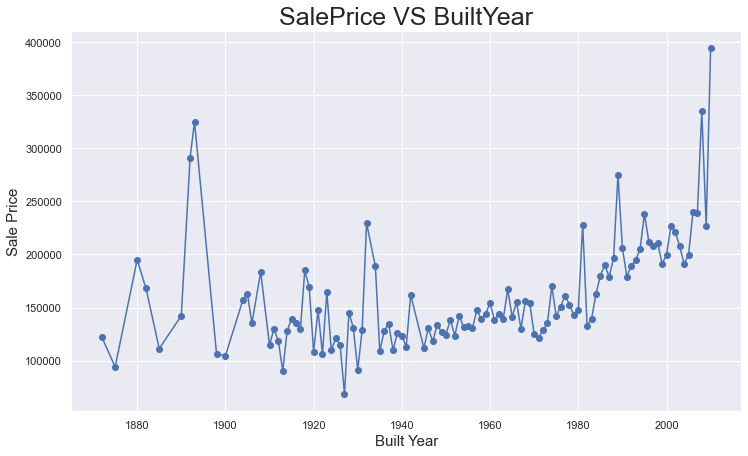

In [13]:
# Average SalePrice in Every Built Year.

sns.set(style='darkgrid')
plt.figure(figsize=(12,7))
plt.plot(train_copy.groupby("YearBuilt")["SalePrice"].median(),marker="o")
plt.title("SalePrice VS BuiltYear",fontsize=25)
plt.xlabel("Built Year",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.show()

from upper graph it's clear that if House is newly Built than the chance is to get high sale price

Text(0, 0.5, 'SalePrice')

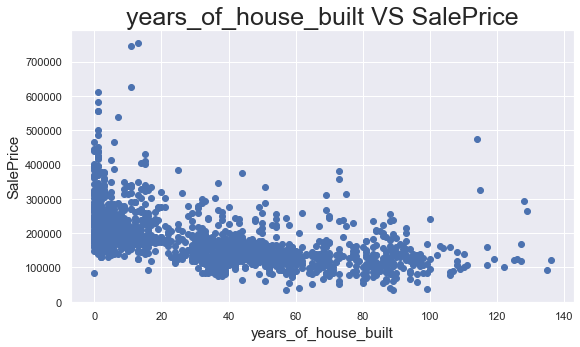

In [14]:
# Graph between years_of_house_built at the year of Sold and SalePrice.


train_copy["years_of_house_built"] = train_copy["YrSold"]-train_copy["YearBuilt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_house_built"],train_copy["SalePrice"])
plt.title("years_of_house_built VS SalePrice",fontsize=25)
plt.xlabel("years_of_house_built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)

from upper graph can see that if house is 0 to 20 year old than the price of sale's is very high

Text(0, 0.5, 'SalePrice')

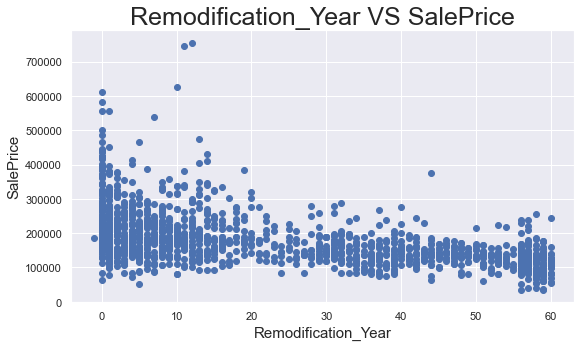

In [15]:
# Graph between years_of_Remodification at the year of Sold  and SalePrice.

train_copy["years_of_RemodAdd"] = train_copy["YrSold"]-train_copy["YearRemodAdd"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_RemodAdd"],train_copy["SalePrice"])
plt.title("Remodification_Year VS SalePrice",fontsize=25)
plt.xlabel("Remodification_Year",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


from upper graph it's clear that if Number of Remodification year is less tham 15 year's than the saling price's also High.

Text(0, 0.5, 'SalePrice')

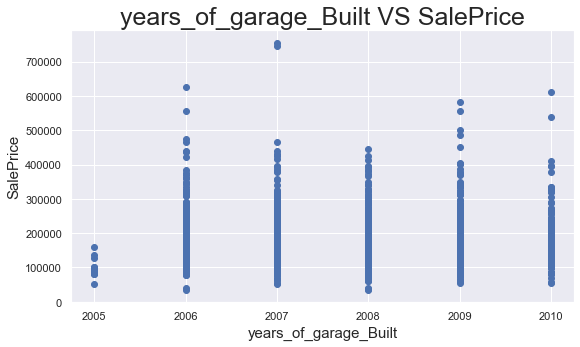

In [16]:
# Graph between years_of_garage_Built at the year of Sold  and SalePrice.

train_copy["years_of_garage_Built"] = train_copy["YrSold"]-train_copy["GarageYrBlt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_garage_Built"],train_copy["SalePrice"])
plt.title("years_of_garage_Built VS SalePrice",fontsize=25)
plt.xlabel("years_of_garage_Built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


In which year garage was built it's not impacting so much the Price of sale.

In [17]:
# taking those feature's having the unique value less than 25 in continuous feature.

discrete_features = [feature for feature in numerical_features if len(train[feature].unique())<25]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

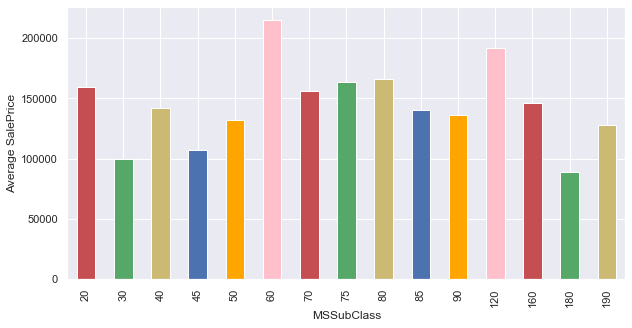

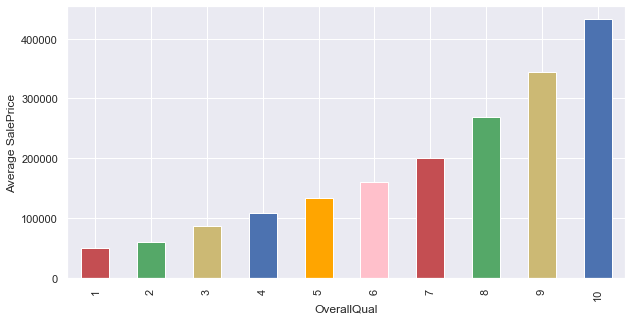

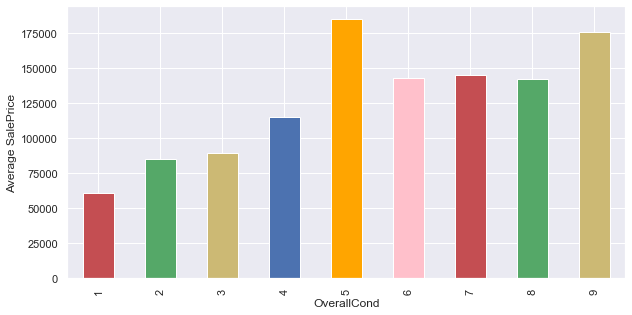

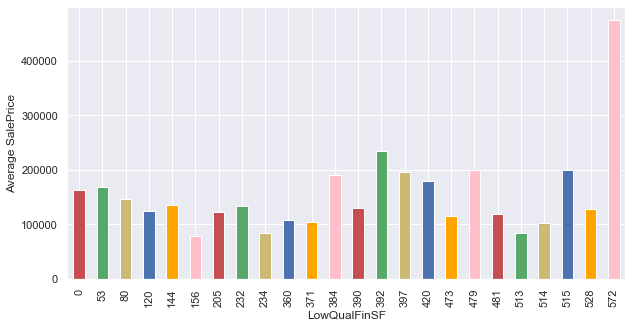

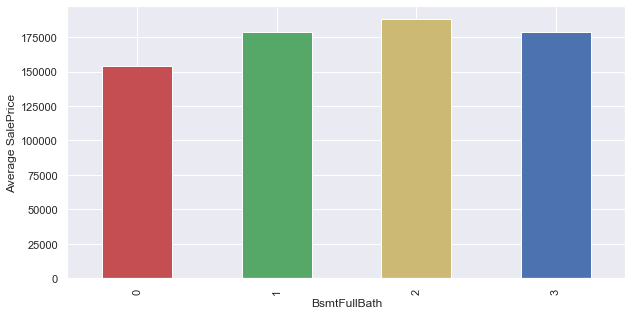

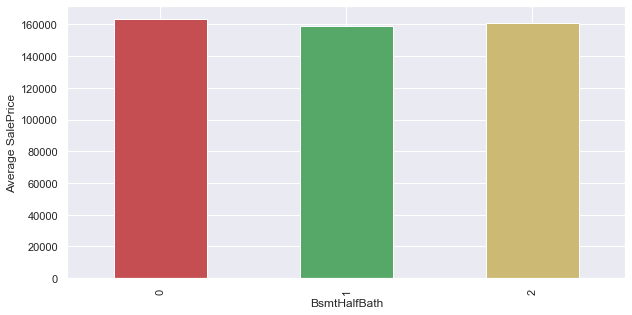

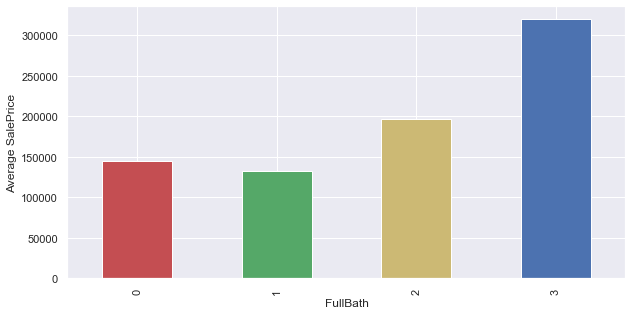

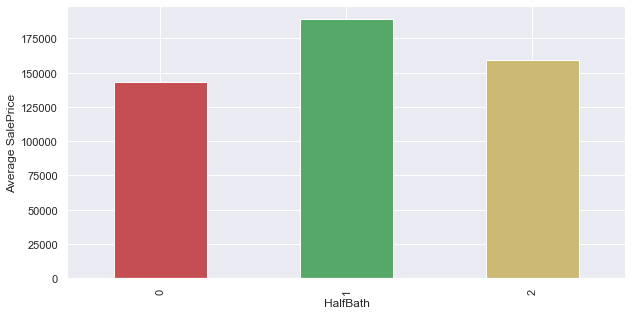

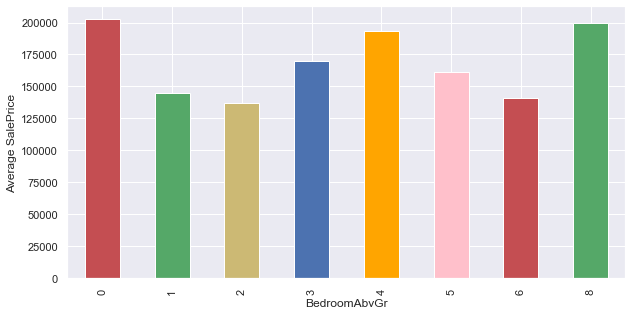

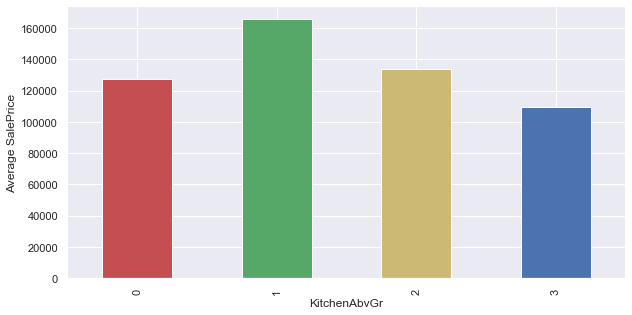

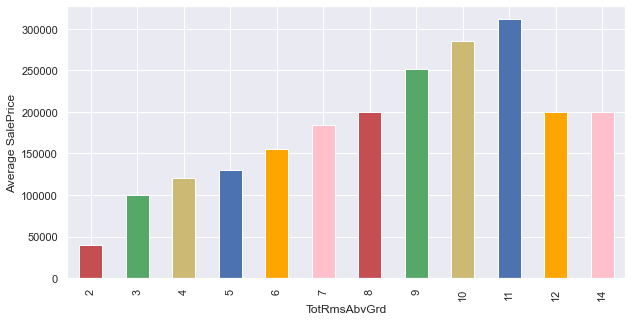

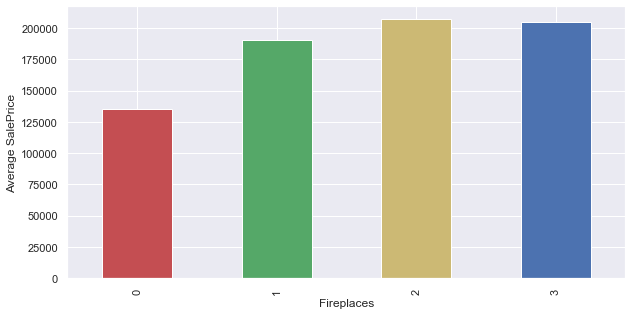

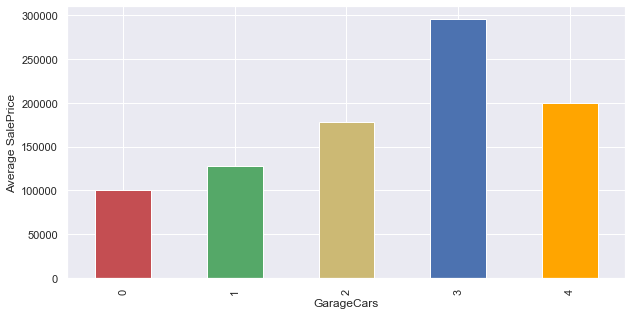

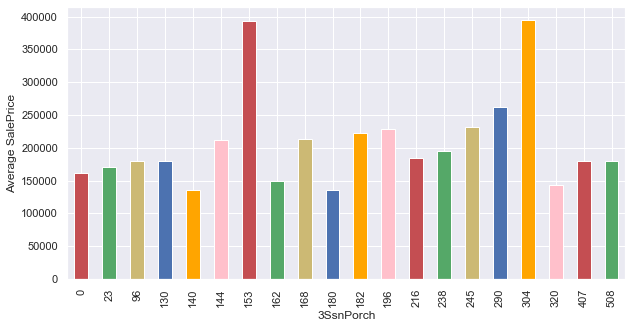

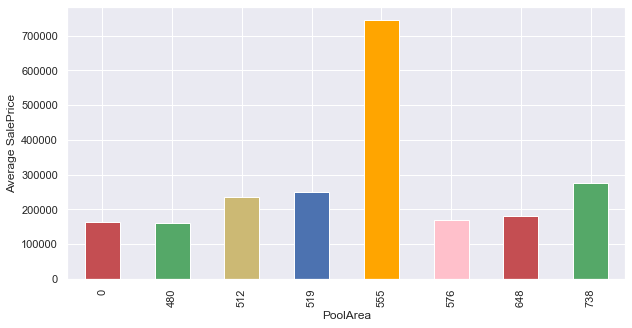

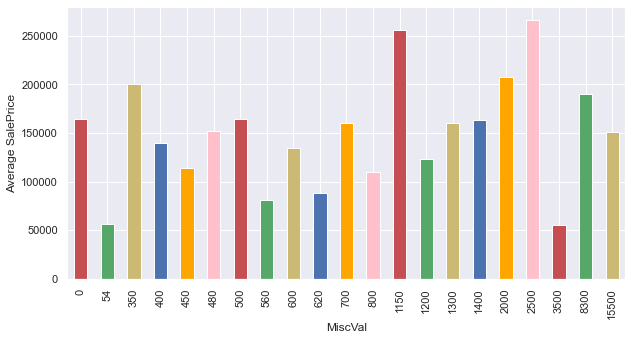

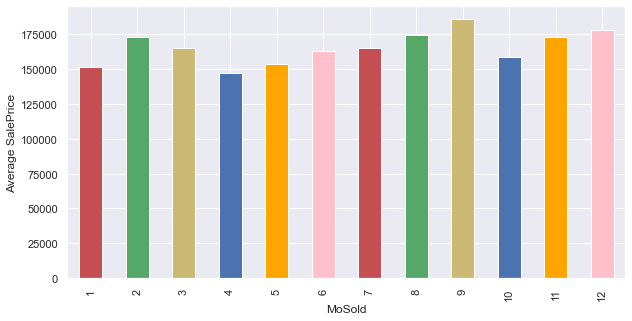

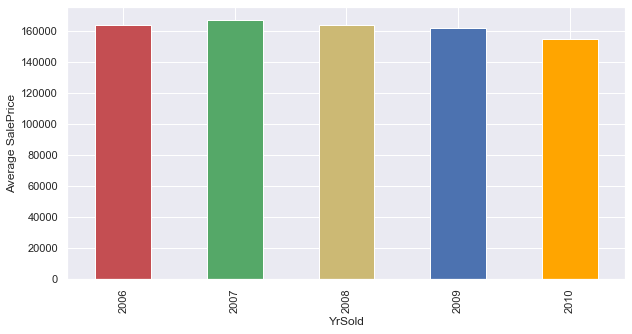

In [18]:
# Make bar chart of discrete features and try to get some information.

for feature in discrete_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["r","g","y","b","orange","pink"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average SalePrice")
    plt.show()
    

1- from upper graph one thing is clear if Overall Quality is increasing from 1 to 10 than Price of House also Increasing.

2- if full Bathrooms are 3 than Price's also High.

3- In Total rooms above grade feature house price is increasing from 2 to 11 Grade but grade 12 and 14 aren't impacting the sales Price so much in comparision of 9,10,11 grade.

4- if fire places are 2 or 3 both are impacting the Price equally more Fire places doesn't mean that they would give higher sale price.

5- if garage are three price is also high but more than 3 garge aren't giving high sale prices.

In [19]:
#check how many of unique values are present in categorical features.
for feature in categorical_features:
    print(feature,":",len(train[feature].unique()),"unique values")

MSZoning : 5 unique values
Street : 2 unique values
Alley : 3 unique values
LotShape : 4 unique values
LandContour : 4 unique values
Utilities : 2 unique values
LotConfig : 5 unique values
LandSlope : 3 unique values
Neighborhood : 25 unique values
Condition1 : 9 unique values
Condition2 : 8 unique values
BldgType : 5 unique values
HouseStyle : 8 unique values
RoofStyle : 6 unique values
RoofMatl : 8 unique values
Exterior1st : 15 unique values
Exterior2nd : 16 unique values
MasVnrType : 5 unique values
ExterQual : 4 unique values
ExterCond : 5 unique values
Foundation : 6 unique values
BsmtQual : 5 unique values
BsmtCond : 5 unique values
BsmtExposure : 5 unique values
BsmtFinType1 : 7 unique values
BsmtFinType2 : 7 unique values
Heating : 6 unique values
HeatingQC : 5 unique values
CentralAir : 2 unique values
Electrical : 6 unique values
KitchenQual : 4 unique values
Functional : 7 unique values
FireplaceQu : 6 unique values
GarageType : 7 unique values
GarageFinish : 4 unique value

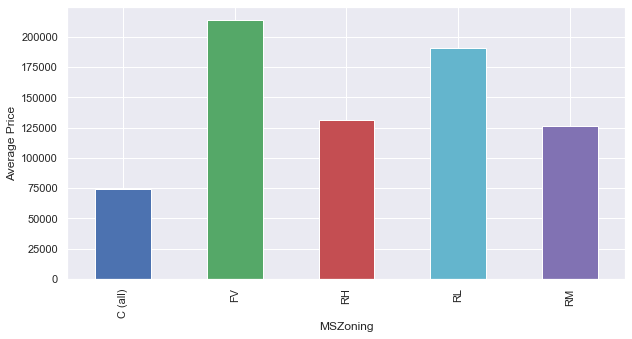

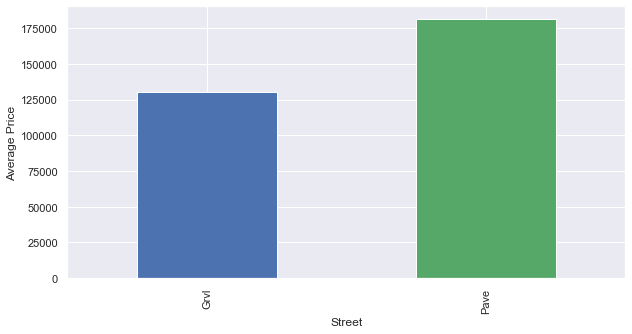

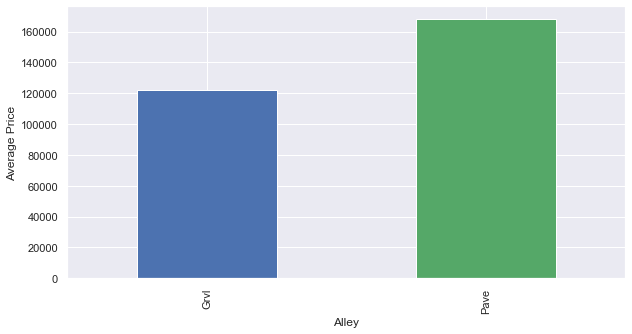

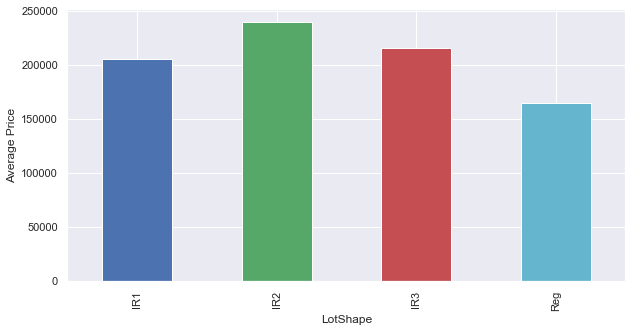

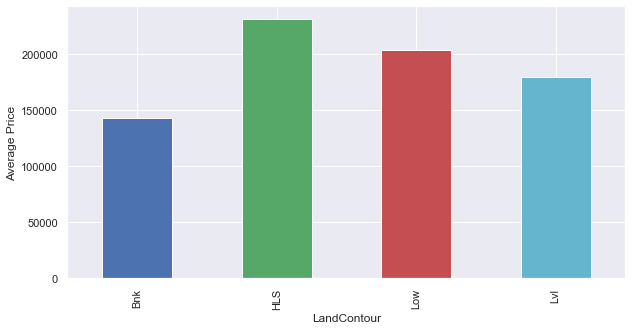

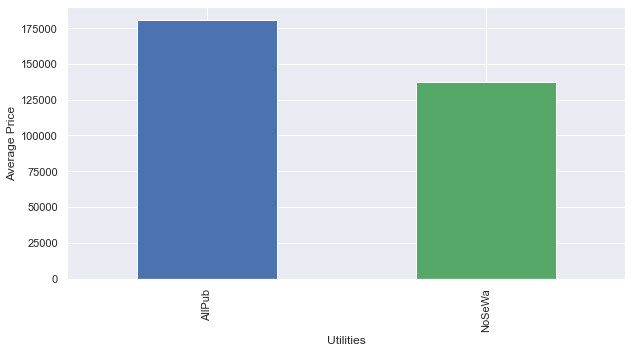

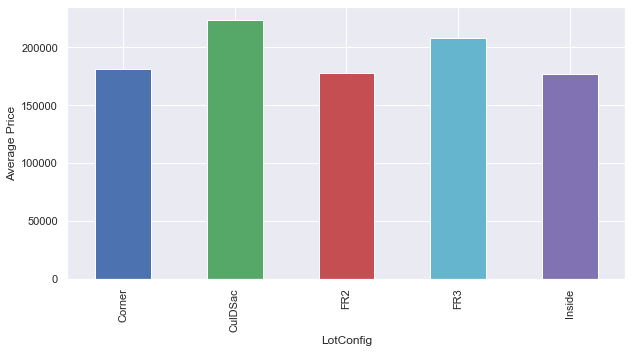

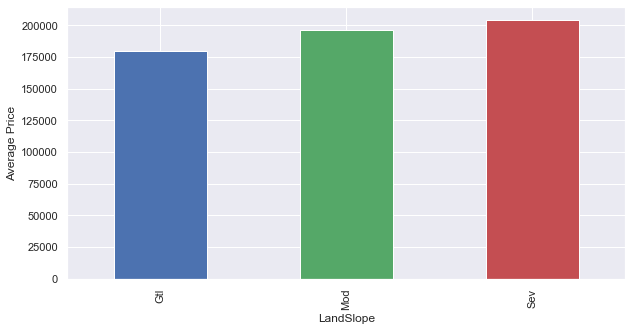

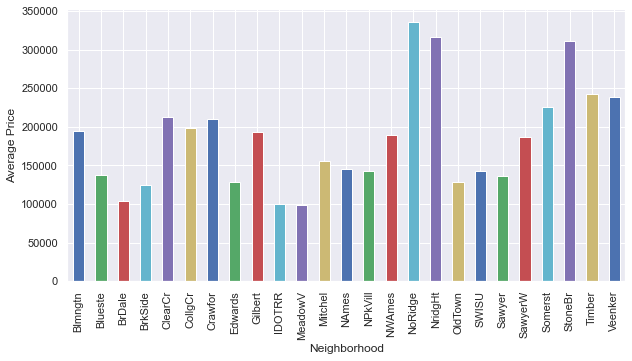

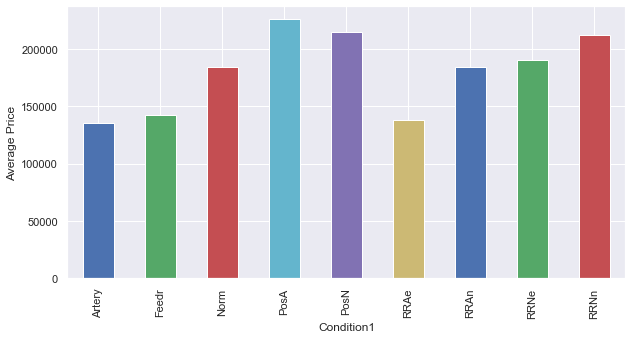

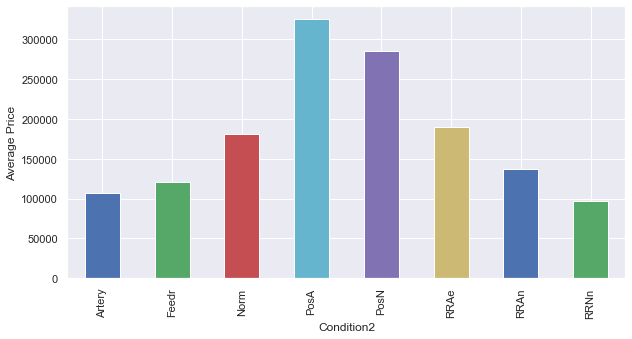

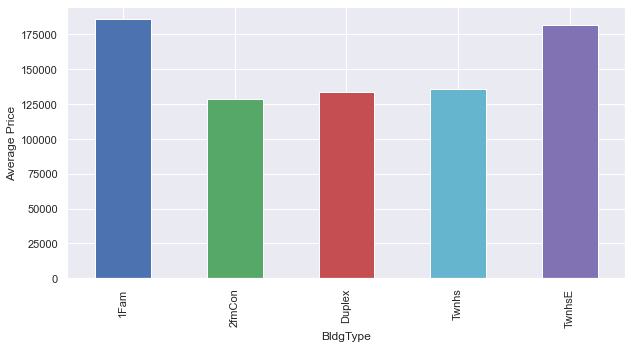

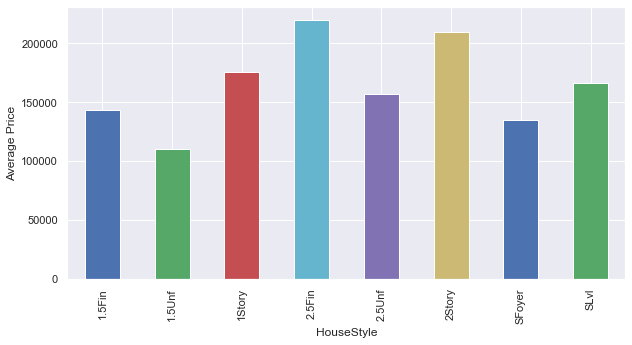

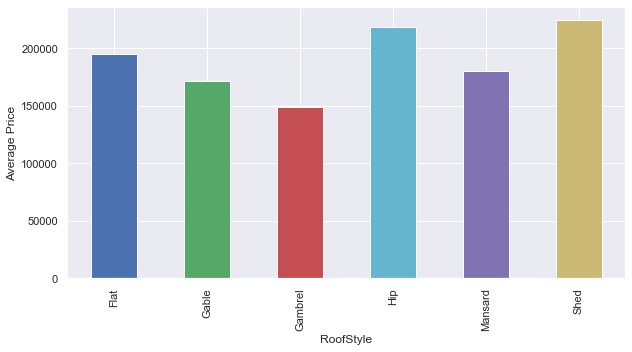

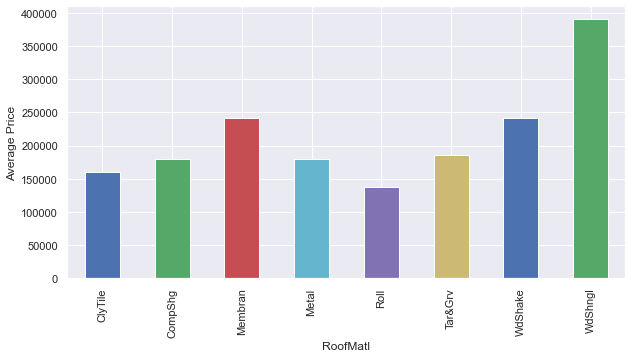

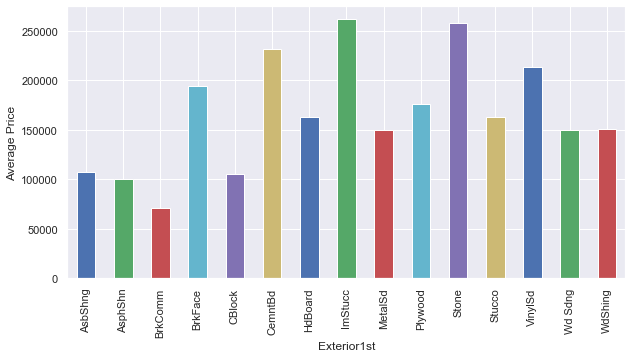

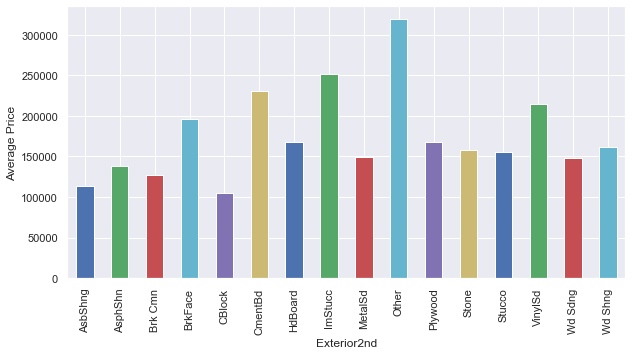

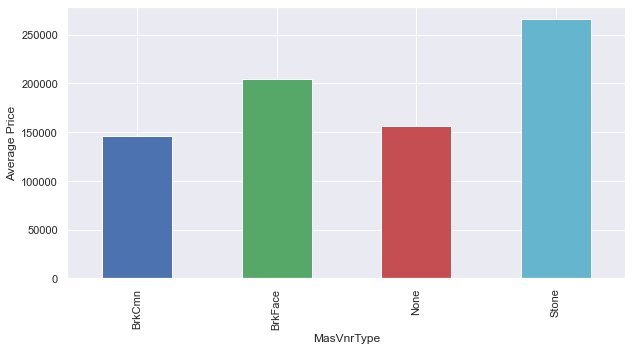

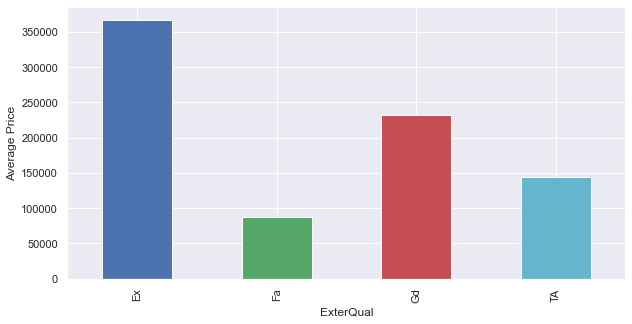

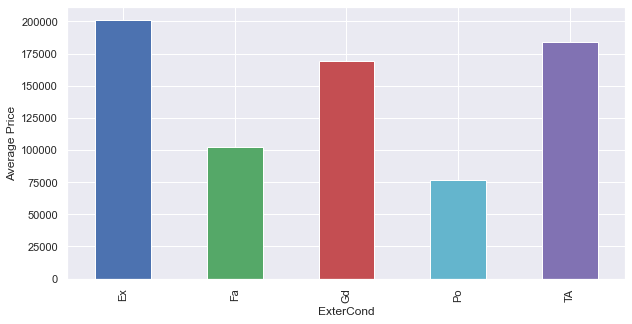

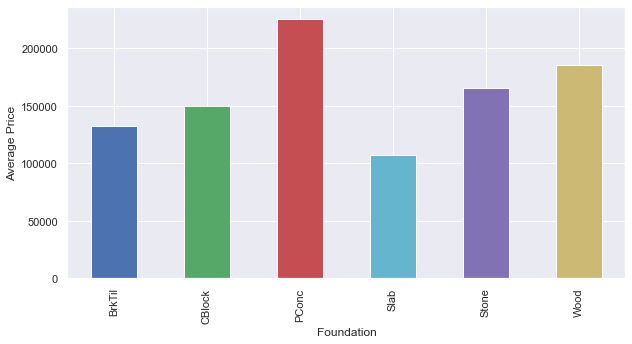

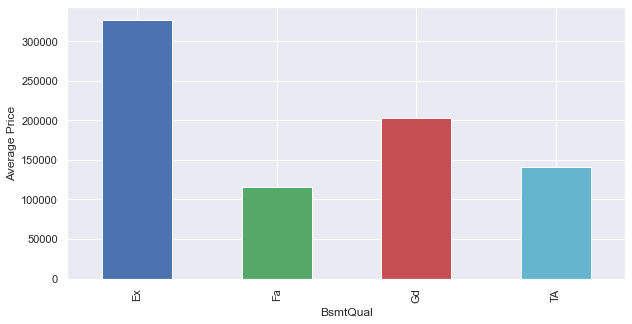

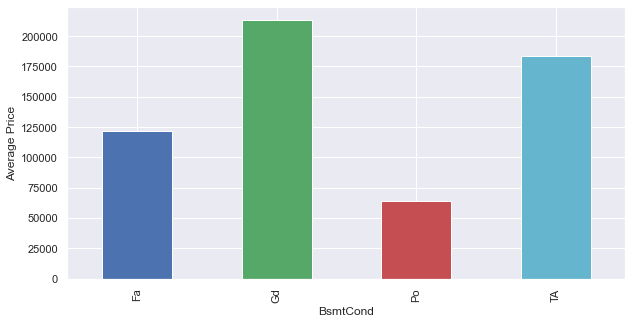

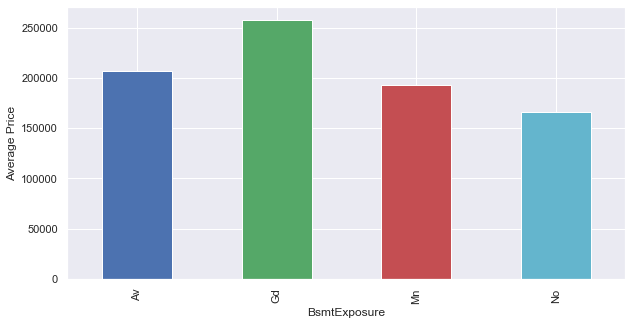

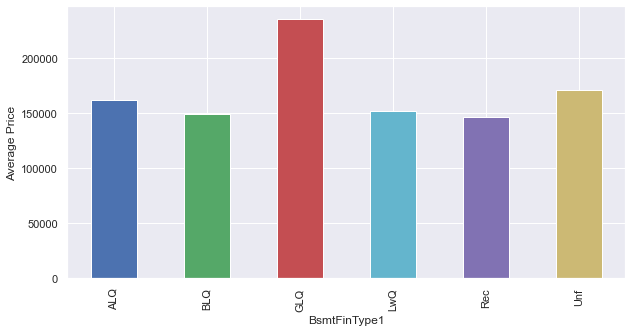

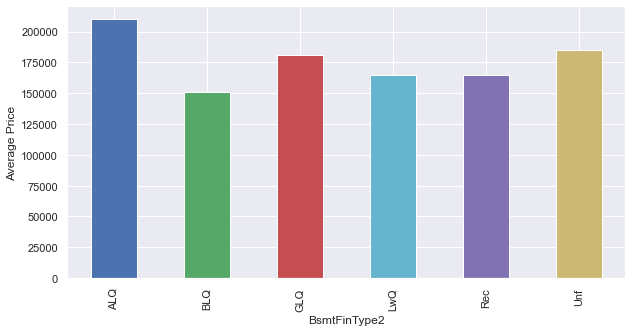

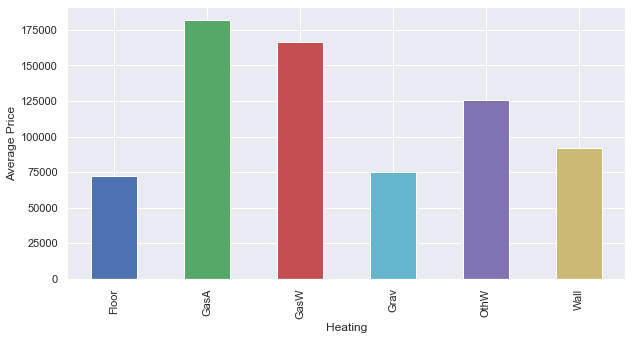

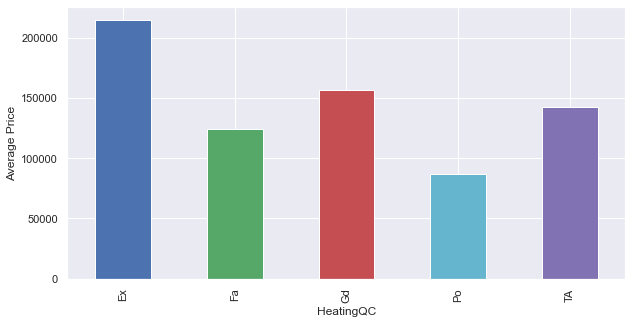

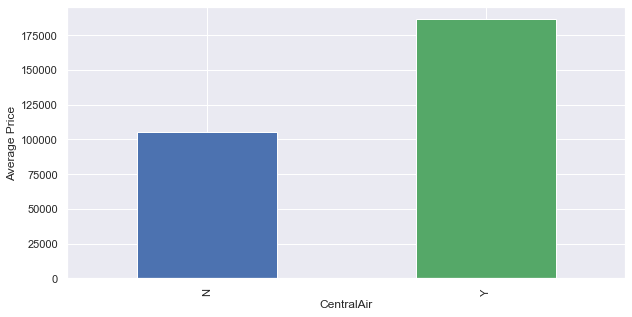

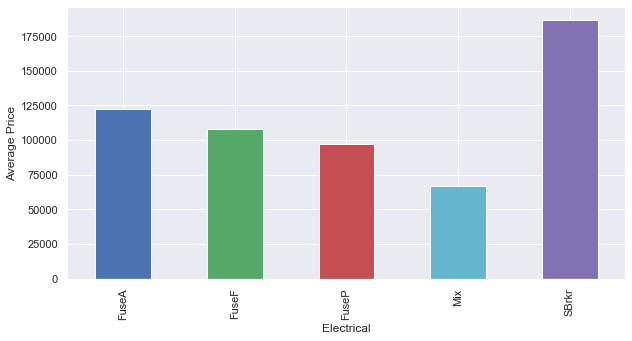

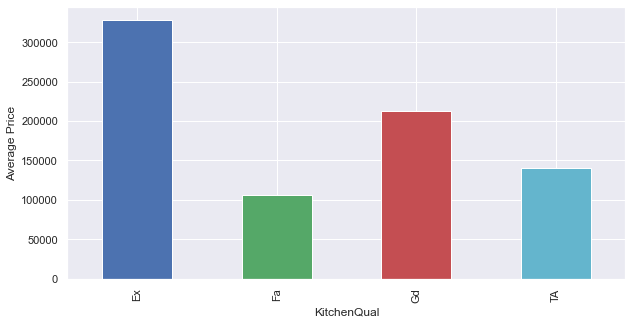

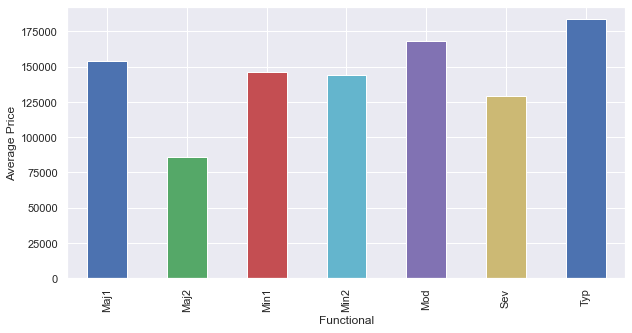

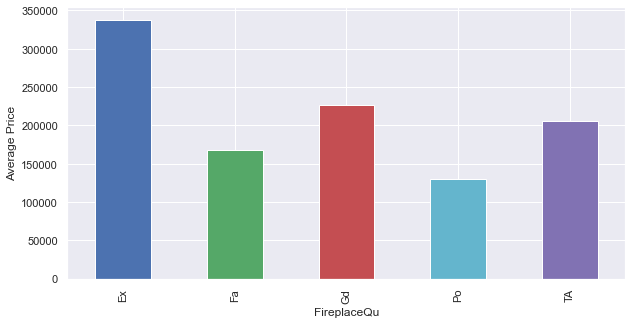

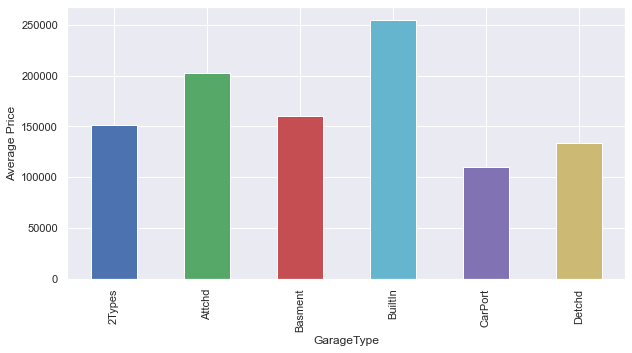

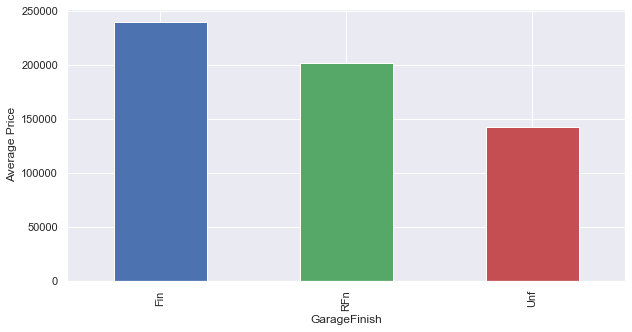

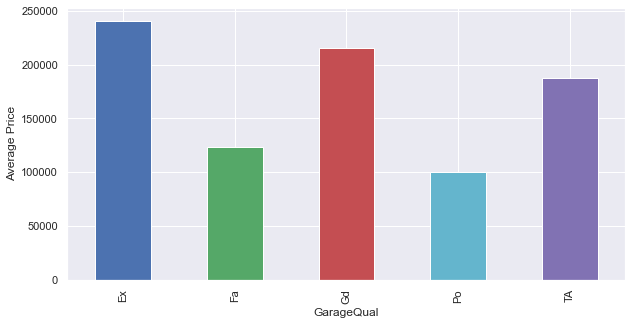

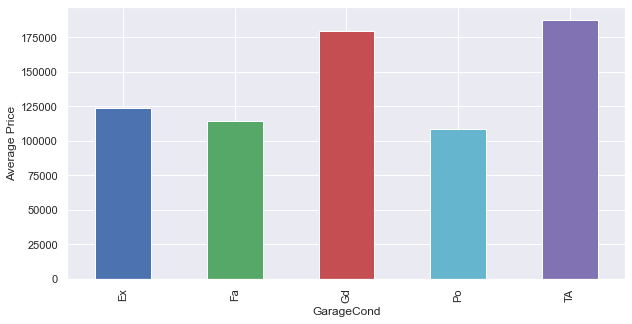

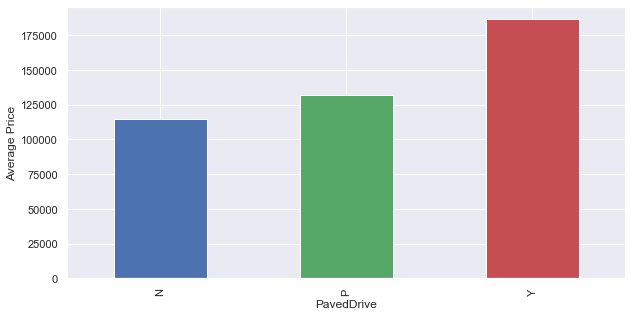

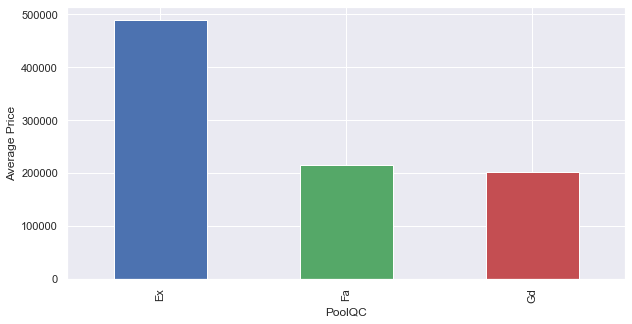

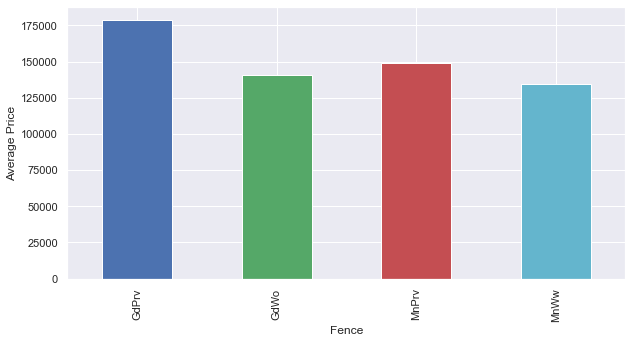

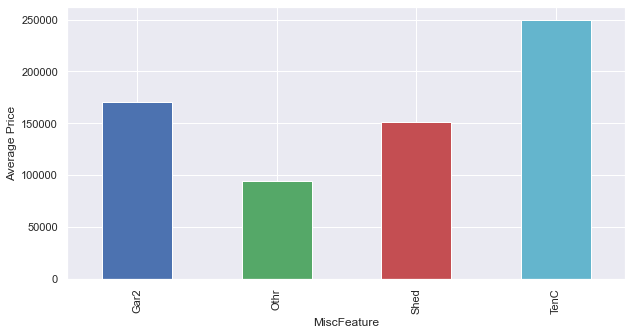

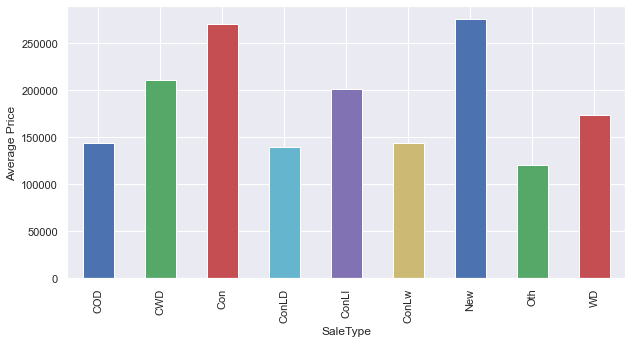

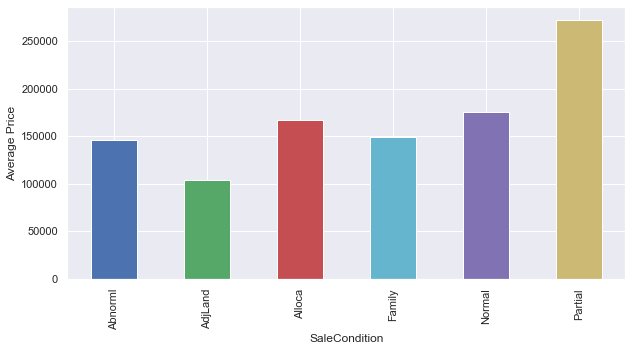

In [20]:
for feature in categorical_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].mean().plot.bar(color=["b","g","r","c","m","y"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average Price")
    plt.show()

1- from upper graph Floating Village Residential Zoning showing the Highest Selling Price it could be because Floating Residential are very expensive,Residential Low Density zoning showing 2nd Highest Price.

2- If all Type of utilities are available than Average Price is also High.

3- If Stone is used in Masonry than price is also high in comparison of Brick Common,Brick Face and Cinder Block.

4- from graph it's clear that if Exterior Quality is excellent than the House Price is also High.
5- If Central Air is also Available than the Price is also High.

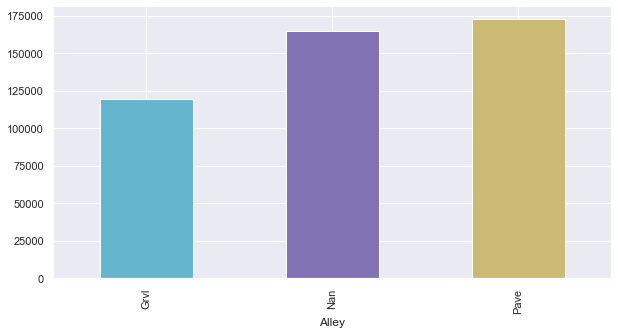

In [21]:
train_copy = train.copy()

train_copy["Alley"] = train_copy["Alley"].fillna("Nan")


train_copy.groupby("Alley")["SalePrice"].median().plot.bar(color=["c","m","y"],figsize=(10,5))

# Load Test Dataset

In [22]:
test = pd.read_csv("test.csv")
test = test.drop(["Id"],axis=1)
test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   
4            0.0        Gd        TA      PConc       Gd       TA   


# Combine Train and Test Datasets

In [23]:
df = pd.concat([train,test])
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# Check Null Values by Visualization

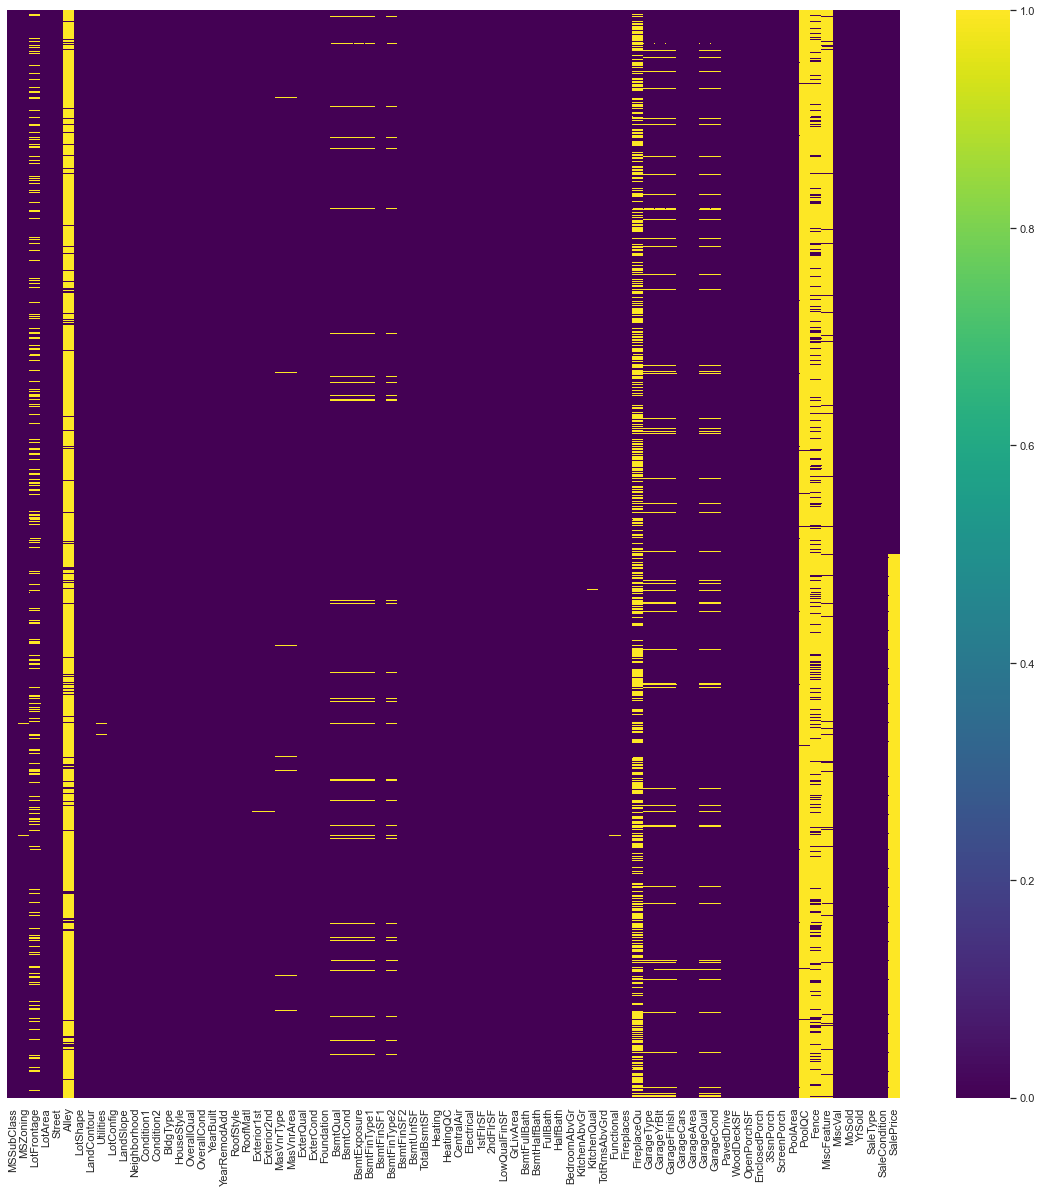

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [25]:
# null values in  each columns:

df_nan_features = [features for features in df.columns if df[features].isnull().sum()>=1]
df_nan_features

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [26]:
df[df_nan_features].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [27]:
# Percentage of null values in each NAN Columns
df[df_nan_features].isnull().mean()

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
SalePrice       0.499829
dtype: float64

#  Function to Handle Missing Value

In [28]:
# Function for MEAN Imputing in Nan values

def impute_mean(data_frame,feature_name):
    mean_value = data_frame[feature_name].mean()
    data_frame[feature_name+"_mean"] =  data_frame[feature_name].fillna(mean_value)

In [29]:
# Function for MEDIAN Imputing in Nan values

def impute_median(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name+"_median"] =  data_frame[feature_name].fillna(median_value)

In [30]:
# Second Function for MEDIAN Imputing in Nan values

def impute_median_2(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name] = data_frame[feature_name].fillna(median_value)

In [31]:
# For Function for MODE Imputing in Nan values

def impute_mode(data_frame,feature_name):
    mode_value = data_frame[feature_name].mode()
    data_frame[feature_name] =  data_frame[feature_name].fillna(mode_value[0])

In [32]:
# Funtioc for Imputing Nan values by RANDOM method.

def impute_random(data_frame,feature_name):
    data_frame[feature_name+"_random"] = data_frame[feature_name]
    random_state = data_frame[feature_name].dropna().sample(data_frame[feature_name].isnull().sum(),random_state = 0)
    random_state.index =data_frame[data_frame[feature_name].isnull()].index
    data_frame.loc[data_frame[feature_name].isnull(),feature_name+"_random"] = random_state

In [33]:
# Function for make histogram

def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

In [34]:
# Function for make Boxplot

def boxplot(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name])

# Handling Missing Value in Categorical Feature

In [35]:
df[df_nan_features].isnull().mean()

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
SalePrice       0.499829
dtype: float64

#some categorical features are having null values, reason could be for null values is some of House's don't have these category for Example Fire place Quality feature having lots of nan because some house's don't have Fire Place's so there Quality would have Nan. 
so fill all these categorical feature with new category .

In [36]:
df["Alley"] = df["Alley"].fillna("NA")

In [37]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")

In [38]:
df["BsmtQual"] = df["BsmtQual"].fillna("NA")

In [39]:
df["BsmtCond"] = df["BsmtCond"].fillna("NA")

In [40]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("NA")

In [41]:
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NA")

In [42]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NA")

In [43]:
df["GarageType"] = df["GarageType"].fillna("NA")

In [44]:
df["GarageFinish"] = df["GarageFinish"].fillna("NA")

In [45]:
df["GarageCond"] = df["GarageCond"].fillna("NA")

In [46]:
df["PoolQC"] = df["PoolQC"].fillna("NA")

In [47]:
df["Fence"] = df["Fence"].fillna("NA")

In [48]:
df["MiscFeature"] = df["MiscFeature"].fillna("NA")

In [49]:
categorical_features = df.select_dtypes(include=["object"])
categorical_features

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave    NA      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1454       RM   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1454      MeadowV       Norm       Norm    Twnhs     2Story     Gable   
1455      MeadowV       Norm       Norm   TwnhsE     2Story     Gable   
1456      Mitchel       Norm       Norm     1Fam     1Story     Gable   
1457      Mitchel       Norm       Norm     1Fam     SFoyer     Gable   
1458      Mitchel       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1454  CompShg     CemntBd     CmentBd       None        TA        TA   
1455  CompShg     CemntBd     CmentBd       None        TA        TA   
1456  CompShg     VinylSd     VinylSd       None        TA        TA   
1457  CompShg     HdBoard     Wd Shng       None        TA        TA   
1458  CompShg     HdBoard     HdBoard    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1454     CBlock       TA       TA           No          Unf          Unf   
1455     CBlock       TA       TA           No          Rec          Unf   
1456     CBlock       TA       TA           No          ALQ          Unf   
1457      PConc       Gd       TA           Av          GLQ          Unf   
1458      PConc       Gd       TA           Av          LwQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [50]:
# null values in categorical features for each columns:

categorical_nan_features = [features for features in categorical_features.columns if categorical_features[features].isnull().sum()>=1]
categorical_nan_features

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageQual',
 'SaleType']

In [51]:
# Percentage of null values in categorical features for each columns

df[categorical_nan_features].isnull().mean()

MSZoning       0.001370
Utilities      0.000685
Exterior1st    0.000343
Exterior2nd    0.000343
MasVnrType     0.008222
Electrical     0.000343
KitchenQual    0.000343
Functional     0.000685
GarageQual     0.054471
SaleType       0.000343
dtype: float64

In [52]:
# all nan values in categorical features replace by mode value of this particular feature.

for feature in categorical_nan_features:
    impute_mode(df,feature)

In [53]:
df[categorical_nan_features].isnull().sum()

MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
Electrical     0
KitchenQual    0
Functional     0
GarageQual     0
SaleType       0
dtype: int64

In [54]:
df.shape

(2919, 80)

# Handle Missing values in Continuous Features

In [55]:
continuous_features = df.select_dtypes(include=["float64","int64"])
continuous_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0       706.0         0.0      150.0   
1             1976         0.0       978.0         0.0      284.0   
2             2002       162.0       486.0         0.0      434.0   
3             1970         0.0       216.0         0.0      540.0   
4             2000       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1454          1970         0.0         0.0         0.0      546.0   
1455          1970         0.0       252.0         0.0      294.0   
1456          1996         0.0      1224.0         0.0        0.0   
1457          1992         0.0       337.0         0.0      575.0   
1458          1994        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0       1710           1.0   
1          1262.0      1262         0             0       1262           0.0   
2           920.0       920       866             0       1786           1.0   
3           756.0       961       756             0       1717           1.0   
4          1145.0      1145      1053             0       2198           1.0   
...           ...       ...       ...           ...        ...           ...   
1454        546.0       546       546             0       1092           0.0   
1455        546.0       546       546             0       1092           0.0   
1456       1224.0      1224         0             0       1224           1.0   
1457        912.0       970         0             0        970           0.0   
1458        996.0       996      1004             0       2000           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         2         1             3             1   
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             1   
1455           0.0         1         1             3             1   
1456           0.0         1         0             4             1   
1457           1.0         1         0             3             1   
1458           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0         2.0       548.0   
1                6           1       1976.0         2.0       460.0   
2                6           1       2001.0         2.0       608.0   
3                7           1       1998.0         3.0       642.0   
4                9           1       2000.0         3.0       836.0   


In [56]:
continuous_nan_features = [feature for feature in continuous_features.columns if continuous_features[feature].isnull().sum()>=1]
continuous_nan_features

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [57]:
# more than 10% Null values in Continuous Feature
df[continuous_nan_features].isnull().mean()>=0.1

LotFrontage      True
MasVnrArea      False
BsmtFinSF1      False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
BsmtFullBath    False
BsmtHalfBath    False
GarageYrBlt     False
GarageCars      False
GarageArea      False
SalePrice        True
dtype: bool

In [58]:
# Handling Missing Values in LotFrontage Feature

df[df["LotFrontage"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7             60       RL          NaN    10382   Pave    NA      IR1   
12            20       RL          NaN    12968   Pave    NA      IR2   
14            20       RL          NaN    10920   Pave    NA      IR1   
16            20       RL          NaN    11241   Pave    NA      IR1   
24            20       RL          NaN     8246   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1387          20       RL          NaN    11088   Pave    NA      Reg   
1390          60       RL          NaN    21533   Pave    NA      IR2   
1440          20       RL          NaN    50102   Pave    NA      IR1   
1441          20       RL          NaN     8098   Pave    NA      IR1   
1448          90       RL          NaN    11836   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7            Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
12           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
14           Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16           Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
24           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
...          ...       ...       ...       ...          ...        ...   
1387         Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
1390         Lvl    AllPub       FR2       Gtl      CollgCr      Feedr   
1440         Low    AllPub    Inside       Mod       Timber       Norm   
1441         Lvl    AllPub    Inside       Gtl       Timber       Norm   
1448         Lvl    AllPub    Corner       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
7          Norm     1Fam     2Story            7            6       1973   
12         Norm     1Fam     1Story            5            6       1962   
14         Norm     1Fam     1Story            6            5       1960   
16         Norm     1Fam     1Story            6            7       1970   
24         Norm     1Fam     1Story            5            8       1968   
...         ...      ...        ...          ...          ...        ...   
1387       Norm     1Fam     1Story            8            5       2002   
1390       Norm     1Fam     2Story            7            5       1996   
1440       Norm     1Fam     1Story            6            5       1958   
1441       Norm     1Fam     1Story            6            5       2000   
1448       Norm   Duplex     1Story            5            5       1970   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
7             1973     Gable  CompShg     HdBoard     HdBoard      Stone   
12            1962       Hip  CompShg     HdBoard     Plywood       None   
14            1960       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16            1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
24            2001     Gable  CompShg     Plywood     Plywood       None   
...            ...       ...      ...         ...         ...        ...   
1387          2002       Hip  CompShg      Stucco      Stucco       None   
1390          1997     Gable  CompShg     VinylSd     VinylSd       None   
1440          1958     Gable  Tar&Grv     Plywood     Plywood       None   
1441          2000     Gable  CompShg     VinylSd     VinylSd       None   
1448          1970     Gable  CompShg     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
7          240.0        TA        TA     CBlock       Gd       TA   
12           0.0        TA        TA     CBlock       TA       TA   
14         212.0        TA        TA     CBlock       TA       TA   
16         180.0        TA        TA     CBlock       TA       TA   
24           0.0        TA        Gd     CBlock       TA       TA   


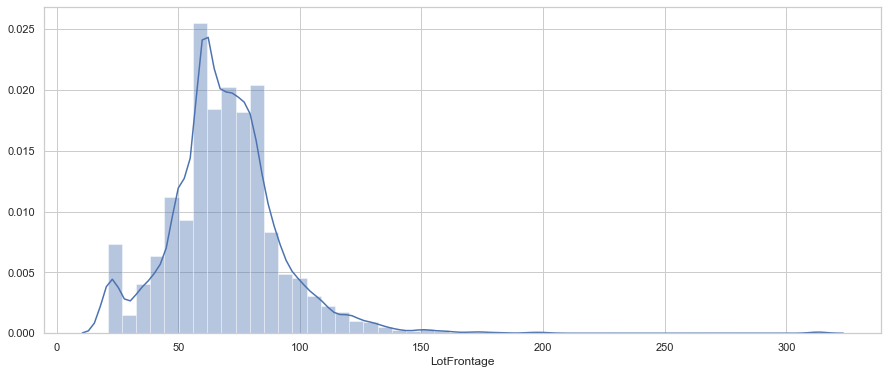

In [59]:
histogram(df,"LotFrontage")

In [60]:
impute_median(df,"LotFrontage")
impute_mean(df,"LotFrontage")
impute_random(df,"LotFrontage")

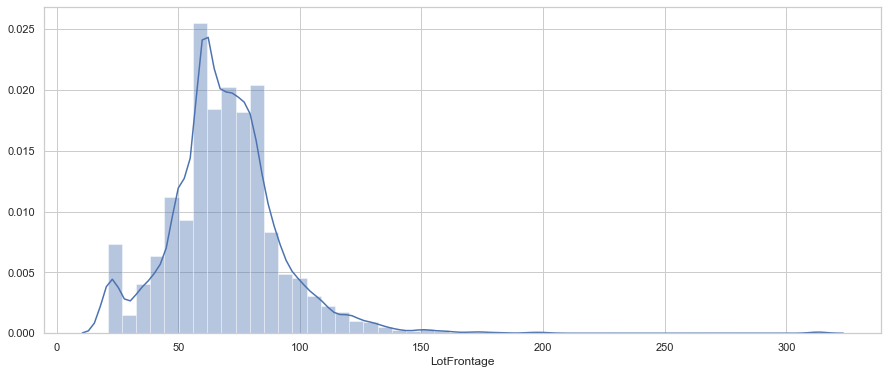

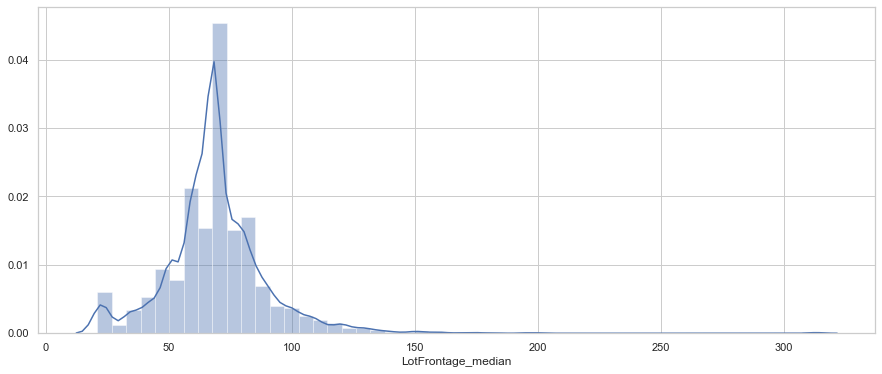

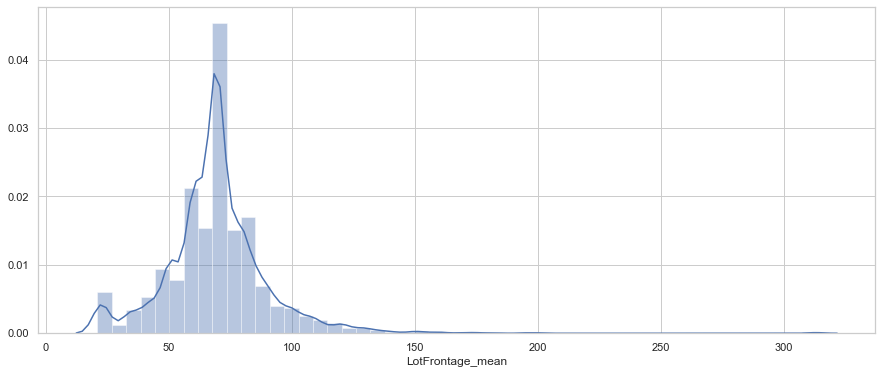

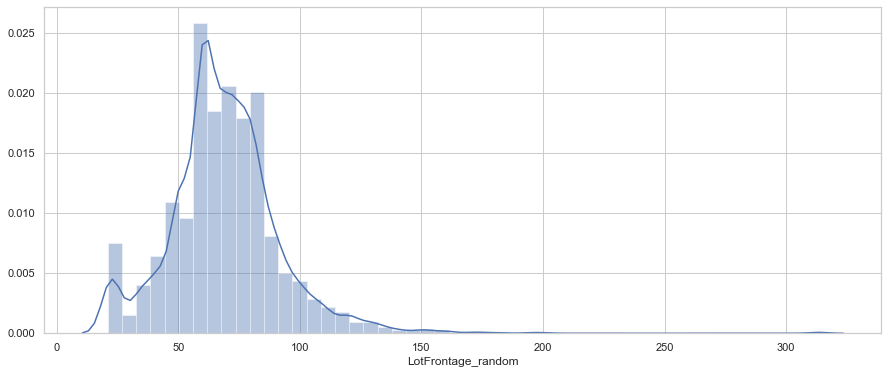

In [61]:
histogram(df,"LotFrontage")
histogram(df,"LotFrontage_median")
histogram(df,"LotFrontage_mean")
histogram(df,"LotFrontage_random")

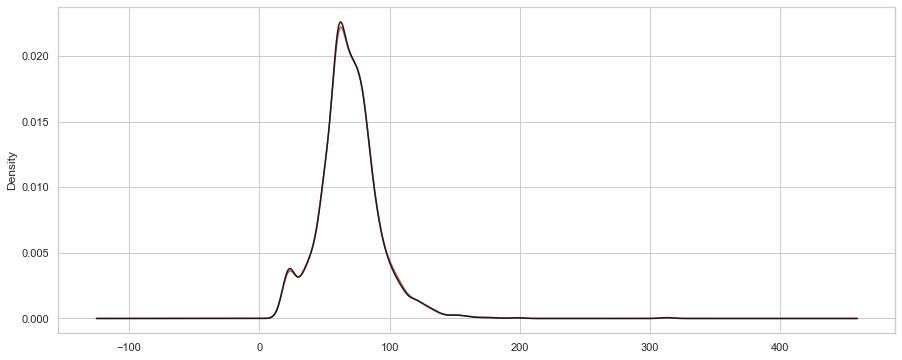

In [62]:
# Feature LotFrontage having more than 10% Null values so replace nan values by Random Sampling Method.

plt.figure(figsize=(15,6))
df["LotFrontage"].plot(kind="kde",c="r")
df["LotFrontage_random"].plot(kind="kde",c = "k")

After Missing Value Imputation Distribution hasn't changed by Random Sampling 

In [63]:
print(df["LotFrontage"].std())
print(df["LotFrontage_random"].std())
 # std also same after Random Sampling

23.34490470692737
23.10783185762143


In [64]:
df["LotFrontage"] = df["LotFrontage_random"]

In [65]:
df = df.drop(["LotFrontage_random","LotFrontage_mean","LotFrontage_median"], axis=1)
df.shape

(2919, 80)

In [66]:
continuous_nan_features = [feature for feature in continuous_features.columns if continuous_features[feature].isnull().sum()>=1]
continuous_nan_features

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [67]:
# NUll values of Those Continuous features having nan less than 10% Replace by median value.
for feature in continuous_nan_features:
    impute_median_2(df,feature)
    

In [68]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

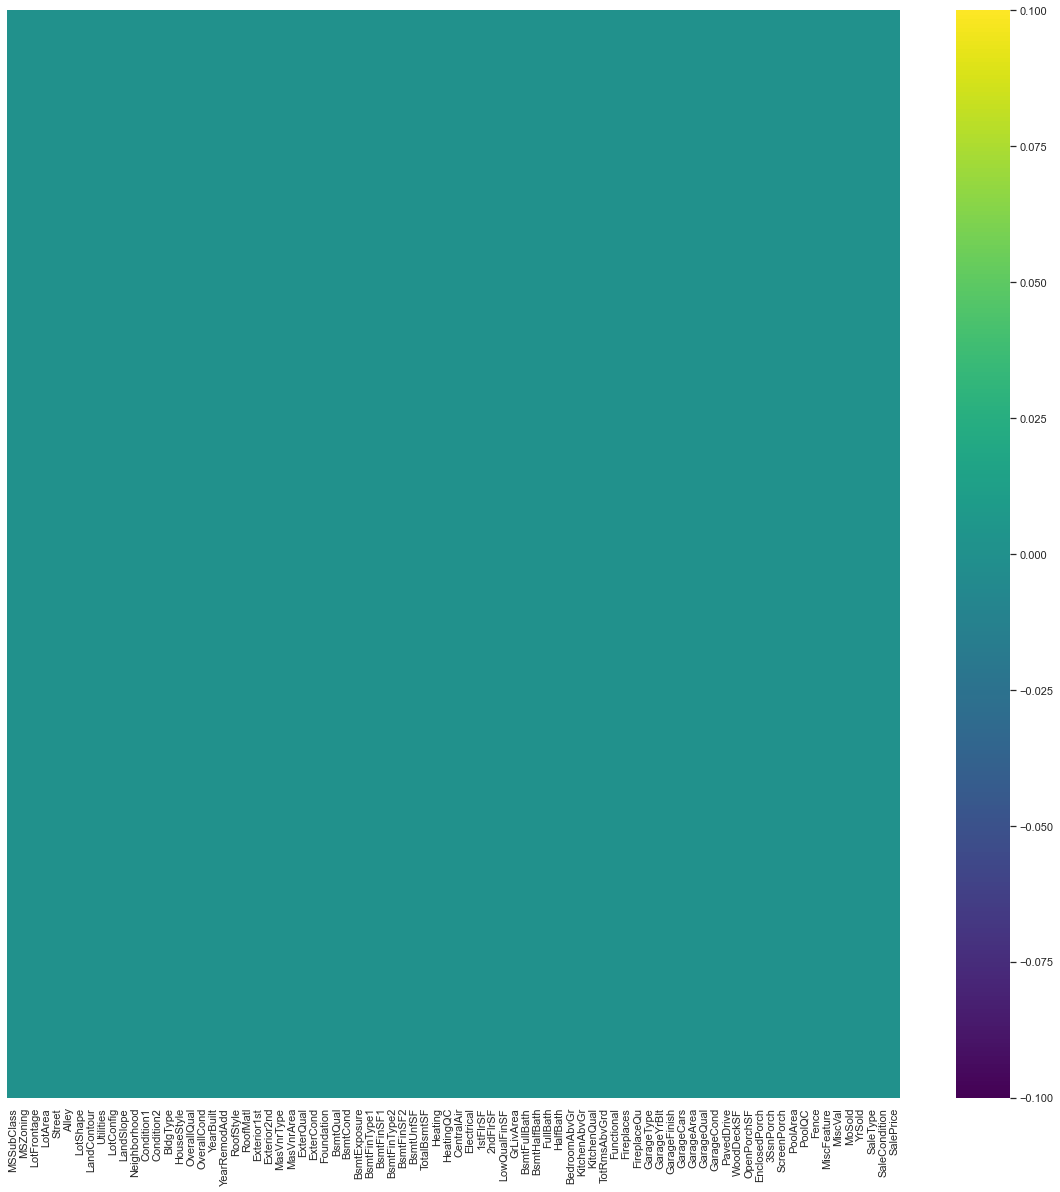

In [69]:
#check again for null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# Handle Outliers and Transformation

In [70]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)
    

In [71]:
#function for detect Outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*3)
    return (lower_bridge,upper_bridge)
    

In [72]:
#function for detect Outliers when feature has Noramally Distributed (by mean-+3std)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_boundary,upper_boundary)
    

In [73]:
#function for check data is Noramally Distributed by QQ-Plot

from scipy  import  stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")
    

In [74]:
# funtion for LOG Transformation Technique 

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")

In [75]:
# function for Reciprocal Transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name]
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")

In [76]:
# function for SquareRoot Transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")   

In [77]:
# function for Exponential Transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")

In [78]:
# function for Box Cox Transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name],parameter = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")

# LotFrontage Feature

In [79]:
df["LotFrontage"].describe()

count    2919.000000
mean       69.041453
std        23.107832
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

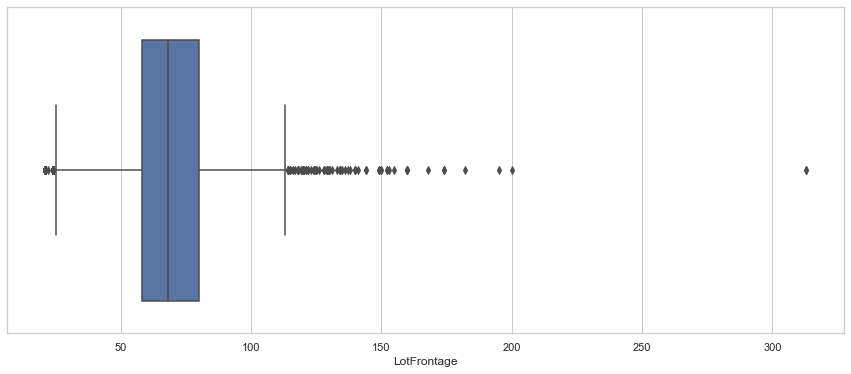

In [80]:
# Detect outliers by boxplot 

boxplot(df,"LotFrontage")

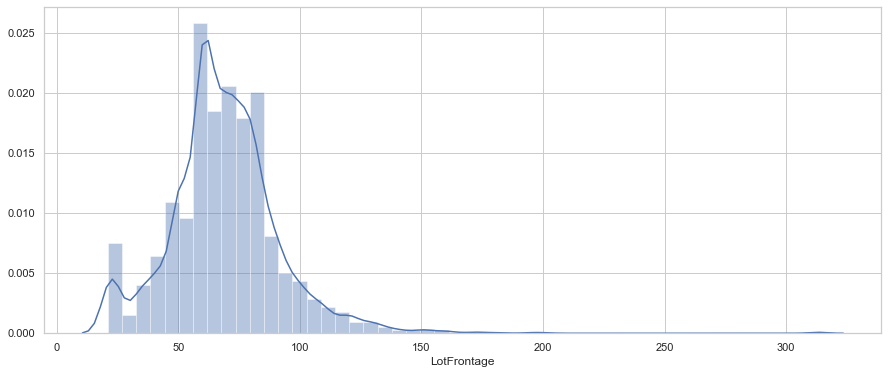

In [81]:
# check Distribution by Histogram.

histogram(df,"LotFrontage")

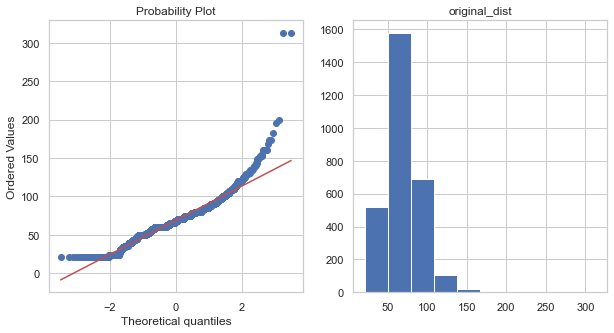

In [82]:
#Check LotFrontage feature Distribution by QQ-plot
original_dist(df,"LotFrontage")

In [83]:
#LotFrontage distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"LotFrontage")

(-0.2820430206203639, 138.3649481251082)

In [84]:
# In LotFrontage more than 138.36 value consider as outliers
df.loc[df["LotFrontage"]>=138.36,"LotFrontage"] = 138.36

In [85]:
df[df["LotFrontage"]>=138.36]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7             60       RL       138.36    10382   Pave    NA      IR1   
171           20       RL       138.36    31770   Pave    NA      IR1   
197           75       RL       138.36    25419   Pave    NA      Reg   
231           60       RL       138.36    15138   Pave    NA      IR1   
277           20       RL       138.36    19138   Pave    NA      Reg   
313           20       RL       138.36   215245   Pave    NA      IR3   
496           20       RL       138.36    12692   Pave    NA      IR1   
807           70       RL       138.36    21384   Pave    NA      Reg   
909           60       RL       138.36    12589   Pave    NA      IR2   
934           20       RL       138.36    27650   Pave    NA      IR2   
975          160       FV       138.36     2651   Pave    NA      Reg   
1107          60       RL       138.36    23257   Pave    NA      IR3   
1127          20       RL       138.36    14572   Pave    NA      IR3   
1182          60       RL       138.36    15623   Pave    NA      IR1   
1211          50       RL       138.36    12134   Pave    NA      IR1   
1298          60       RL       138.36    63887   Pave    NA      IR3   
1337          30       RM       138.36     4118   Pave  Grvl      IR1   
286           60       RL       138.36    12732   Pave    NA      IR1   
780           85       RL       138.36    14137   Pave    NA      Reg   
799           20       RL       138.36    18160   Grvl    NA      Reg   
804          190       RL       138.36    41600   Pave    NA      IR1   
1053          20       RL       138.36    20064   Pave    NA      IR1   
1130          20       RL       138.36    19958   Pave    NA      Reg   
1139          20       RL       138.36    43500   Pave    NA      Reg   
1439          80       RL       138.36    11080   Pave    NA      Reg   
1456          20       RL       138.36    20000   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7            Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
171          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
231          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
277          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
313          Low    AllPub    Inside       Sev       Timber       Norm   
496          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
807          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
909          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
934          HLS    AllPub    Inside       Mod        NAmes       PosA   
975          Lvl    AllPub       FR2       Gtl      Somerst       Norm   
1107         HLS    AllPub   CulDSac       Gtl      Gilbert       Norm   
1127         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1211         Bnk    AllPub    Inside       Mod      Gilbert       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1337         Bnk    AllPub    Corner       Mod      OldTown      Feedr   
286          Lvl    AllPub   CulDSac       Gtl       NWAmes       PosN   
780          Lvl    AllPub    Corner       Gtl      Mitchel       Norm   
799          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
804          Lvl    AllPub       FR2       Gtl      Gilbert       Norm   
1053         Low    AllPub    Inside       Sev      ClearCr       Norm   
1130         Lvl    AllPub    Inside       Gtl       Timber       Norm   
1139         Lvl    AllPub    Inside       Gtl      Mitchel     Artery   
1439         Lvl    AllPub    Corner       Gtl      Mitchel       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle

Apply Some Transformation Techniques on LotFrontage for make distribution as Normally Distributed and check Distribution by QQ-plot.

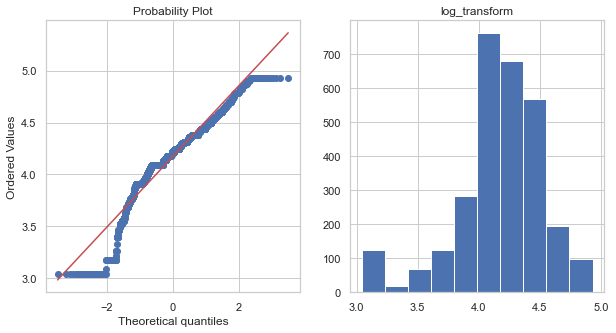

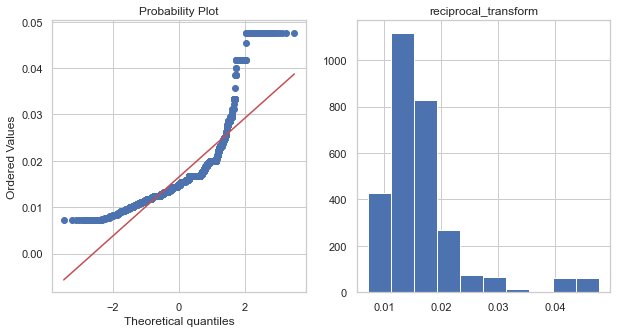

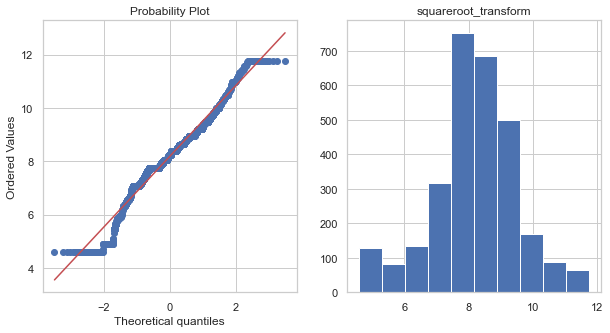

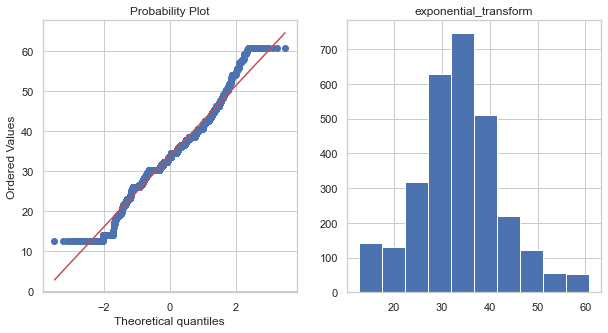

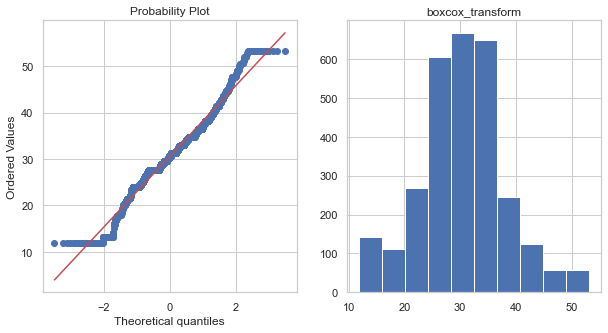

In [86]:
log_transform(df,"LotFrontage")

reciprocal_transform(df,"LotFrontage")

squareroot_transform(df,"LotFrontage")

exponential_transform(df,"LotFrontage")

boxcox_transform(df,"LotFrontage")

After Transformation LotFrontage Feature looks more distort so don't apply Transformation

# LotArea Feature

In [87]:
df["LotArea"].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

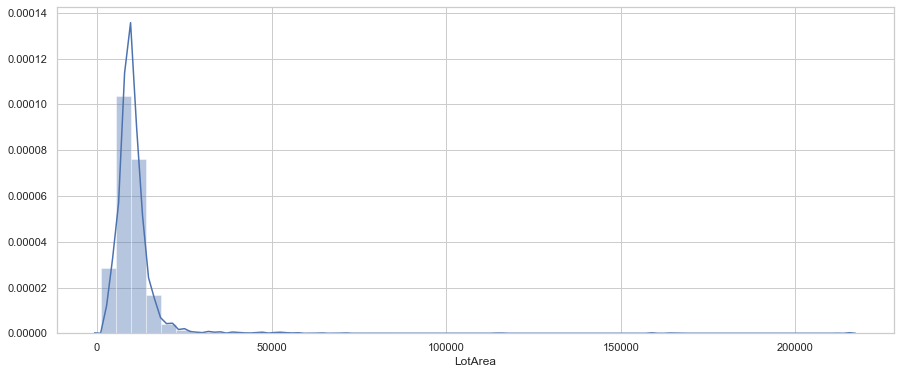

In [88]:
# check Distribution by Histogram.

histogram(df,"LotArea")

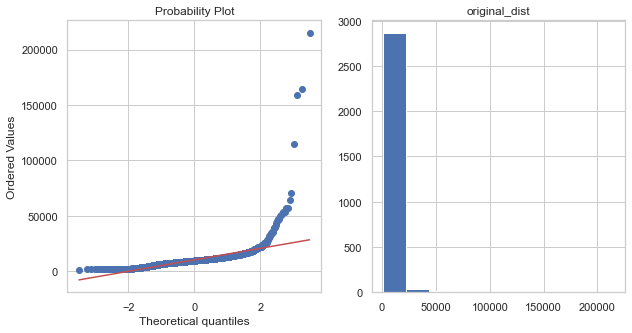

In [89]:
#Check LotFrontage feature Distribution by QQ-plot

original_dist(df,"LotArea")

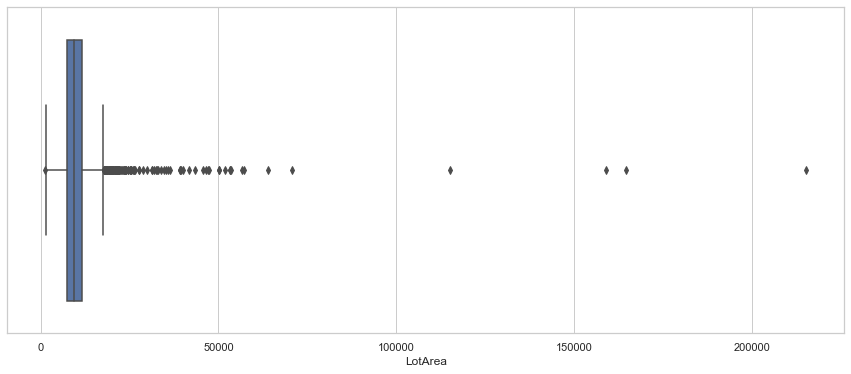

In [90]:
# Detect outliers by boxplot 

boxplot(df,"LotArea")

In [91]:
#LotArea distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"LotArea")

(-13492.874997152216, 33829.10315748109)

In [92]:
# In LotArea more than 33829.10315 value consider as outliers

df.loc[df["LotArea"]>=33829.10315,"LotArea"]=33829.10315

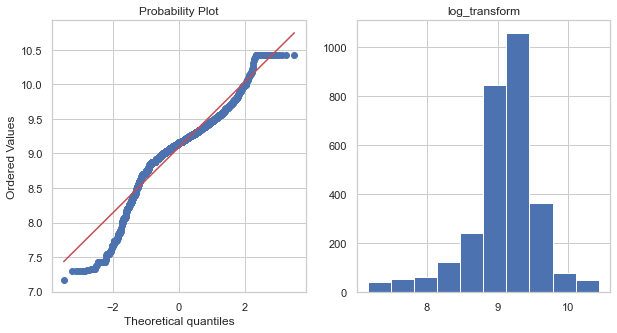

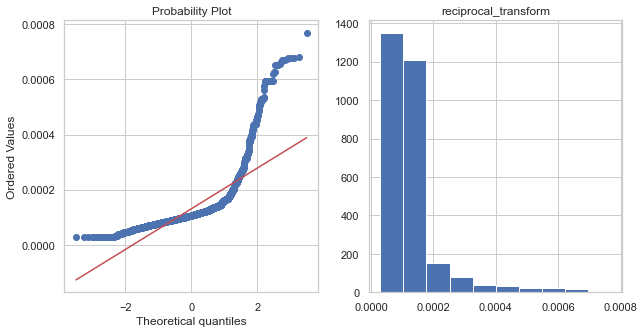

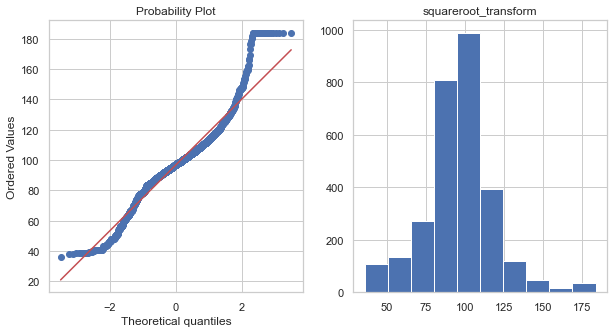

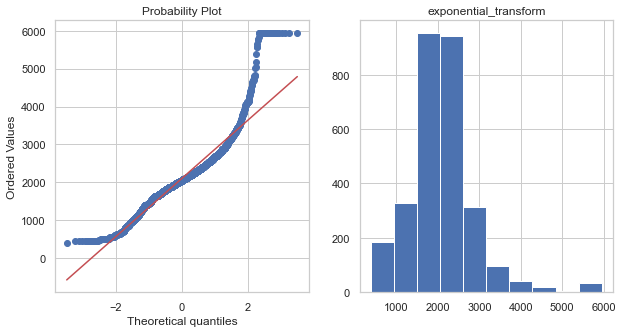

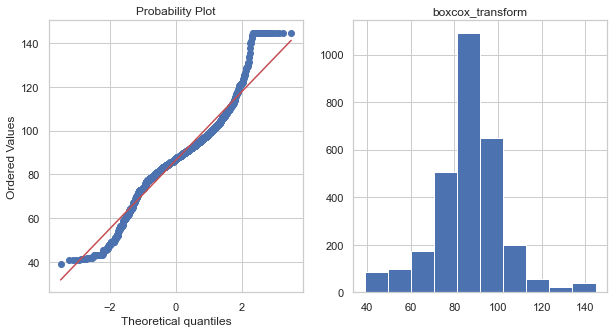

In [93]:
#Apply Some Transformation Techniques on LotArea for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"LotArea")

reciprocal_transform(df,"LotArea")

squareroot_transform(df,"LotArea")

exponential_transform(df,"LotArea")

boxcox_transform(df,"LotArea")

After squareroot and boxcox Transformation LotArea feature seems to more Normally Distributed so apply one transformation on main dataset

In [94]:
# Apply boxcox Transformation on LotArea feature
if 0 in df["LotArea"].unique():
    pass
else:
    df["LotArea"],parameter = stats.boxcox(df["LotArea"])

# MasVnrArea Feature

In [95]:
df[df["MasVnrArea"]==0]

MSSubClass MSZoning  LotFrontage     LotArea Street Alley LotShape  \
1             20       RL        80.00   87.734482   Pave    NA      Reg   
3             70       RL        60.00   87.551771   Pave    NA      IR1   
5             50       RL        85.00  102.296906   Pave    NA      IR1   
8             50       RM        51.00   73.266201   Pave    NA      Reg   
9            190       RL        50.00   79.148712   Pave    NA      Reg   
...          ...      ...          ...         ...    ...   ...      ...   
1453         160       RM        21.00   41.680147   Pave    NA      Reg   
1454         160       RM        21.00   45.959162   Pave    NA      Reg   
1455         160       RM        21.00   45.548057   Pave    NA      Reg   
1456          20       RL       138.36  117.473293   Pave    NA      Reg   
1457          85       RL        62.00   90.724159   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5            Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
8            Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9            Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
...          ...       ...       ...       ...          ...        ...   
1453         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1          Norm     1Fam     1Story            6            8       1976   
3          Norm     1Fam     2Story            7            5       1915   
5          Norm     1Fam     1.5Fin            5            5       1993   
8          Norm     1Fam     1.5Fin            7            5       1931   
9        Artery   2fmCon     1.5Unf            5            6       1939   
...         ...      ...        ...          ...          ...        ...   
1453       Norm    Twnhs     2Story            4            5       1970   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5             1995     Gable  CompShg     VinylSd     VinylSd       None   
8             1950     Gable  CompShg     BrkFace     Wd Shng       None   
9             1950     Gable  CompShg     MetalSd     MetalSd       None   
...            ...       ...      ...         ...         ...        ...   
1453          1970     Gable  CompShg     CemntBd     CmentBd       None   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1            0.0        TA        TA     CBlock       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
5            0.0        TA        TA       Wood       Gd       TA   
8            0.0        TA        TA     BrkTil       TA       TA   
9            0.0        TA       

In [96]:
df["MasVnrArea"].describe()

count    2919.000000
mean      101.396026
std       178.854579
min         0.000000
25%         0.000000
50%         0.000000
75%       163.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

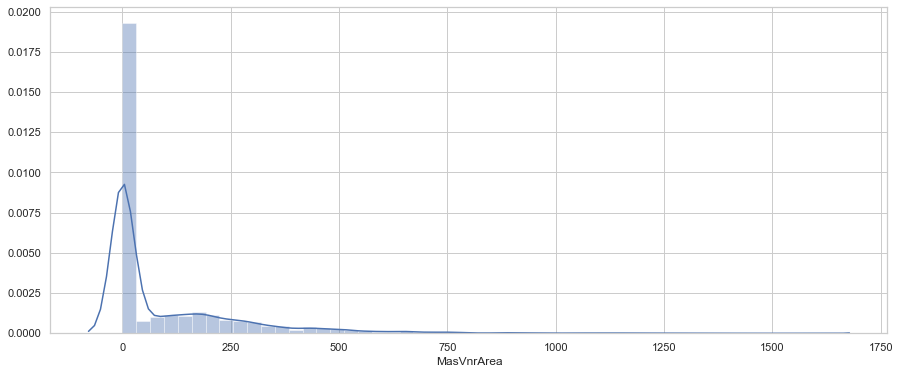

In [97]:
histogram(df,"MasVnrArea")

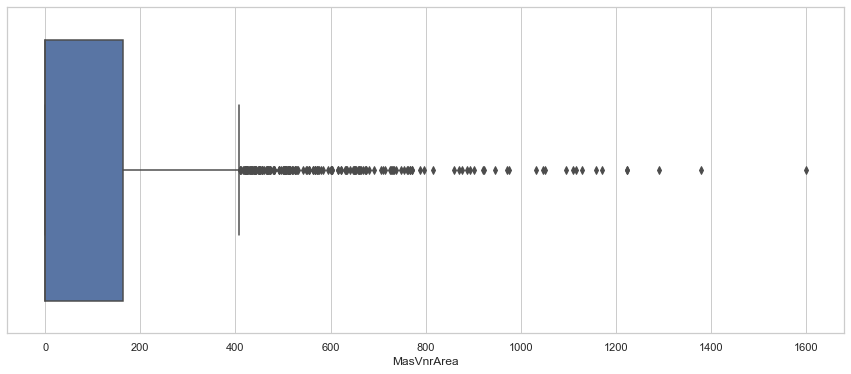

In [98]:
# Detect outliers by boxplot 

boxplot(df,"MasVnrArea")

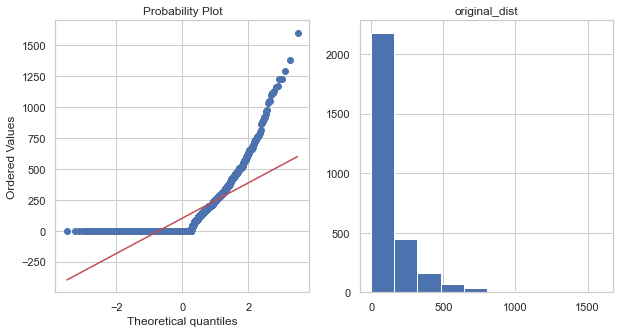

In [99]:
#check Distribution by QQ-plot

original_dist(df,"MasVnrArea")

In [100]:
# MasVnrArea feature is Right skewed ,so detect outliers by 3*IQR

outlier_IQR3(df,"MasVnrArea")

(-490.5, 654.0)

In [101]:
# In MasVnrArea more than 654.0 value consider as outliers

df.loc[df["MasVnrArea"]>=654,"MasVnrArea"]=654

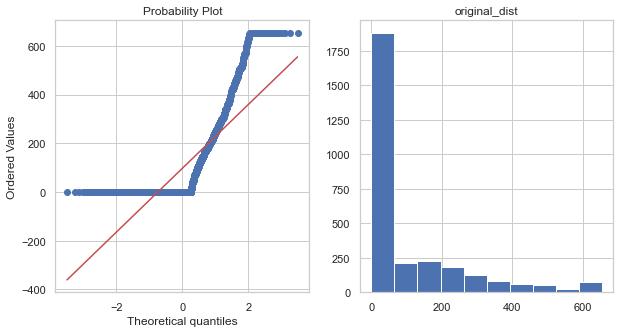

In [102]:
original_dist(df,"MasVnrArea")

# BsmtFinSF1 Feature

In [103]:
df["BsmtFinSF1"].describe()

count    2919.000000
mean      441.398253
std       455.534750
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

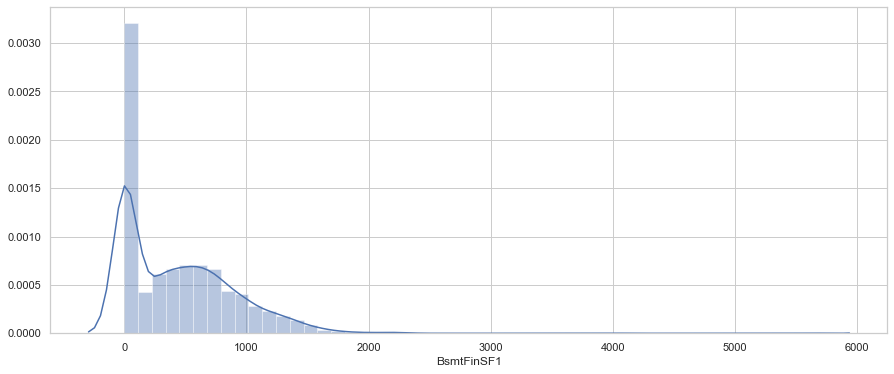

In [104]:
#check Distribution of BsmtFinSF1 feature by Histogram.

histogram(df,"BsmtFinSF1")

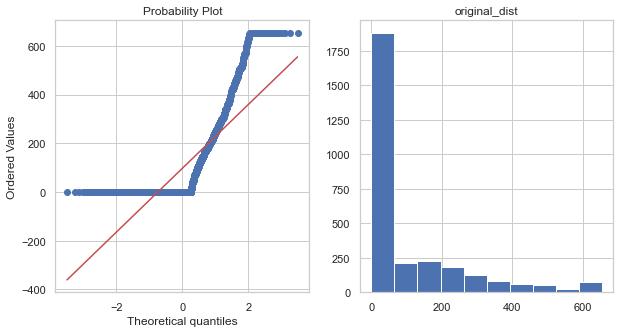

In [105]:
#Check Distribution by QQ-plot
original_dist(df,"MasVnrArea")

In [106]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,'BsmtFinSF1')

(-1099.5, 1832.5)

In [107]:
# In BsmtFinSF1 more than 1773.75 value consider as outliers


df.loc[df["BsmtFinSF1"]>=1773.75,"BsmtFinSF1"]=1773.75

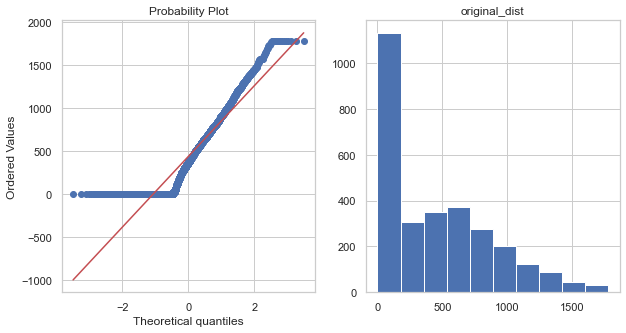

In [108]:
original_dist(df,"BsmtFinSF1")

# BsmtFinSF2 Feature

In [109]:
df["BsmtFinSF2"].describe()

count    2919.000000
mean       49.565262
std       169.179104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

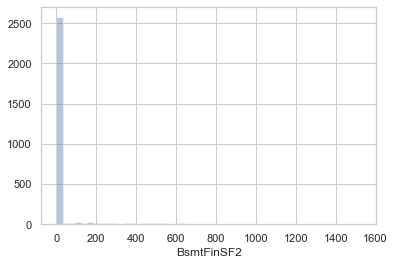

In [110]:
#Check Distribution by Histogram.
sns.distplot(df["BsmtFinSF2"],kde=False)

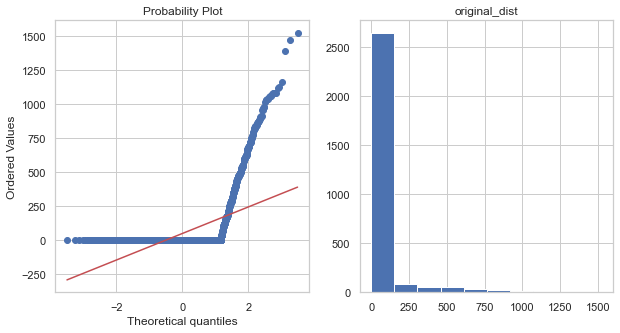

In [111]:
#check Distribution by QQ-plot
original_dist(df,"BsmtFinSF2")

In [112]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"BsmtFinSF2")

(0.0, 0.0)

Because min=0 , 0.25 = 0 so that's why outlier_IQR also 0 , now check by outlier_normally

In [113]:
outlier_normally(df,"BsmtFinSF2")

(-457.97205084683003, 557.1025749989369)

In [114]:
# In BsmtFinSF2 more than 687.279 value consider as outliers


df.loc[df["BsmtFinSF2"]>=687.279,"BsmtFinSF2"] =687.279

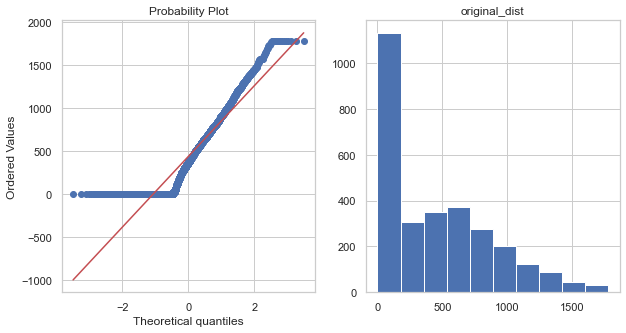

In [115]:
original_dist(df,"BsmtFinSF1")

# BsmtUnfSF Feature

In [116]:
df["BsmtUnfSF"].describe()

count    2919.000000
mean      560.739979
std       439.471764
min         0.000000
25%       220.000000
50%       467.000000
75%       805.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

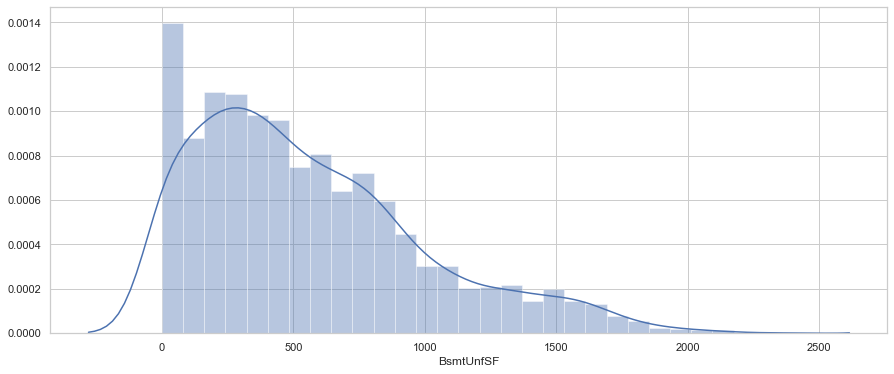

In [117]:
#Check Distribution by Histogram.
histogram(df,"BsmtUnfSF")

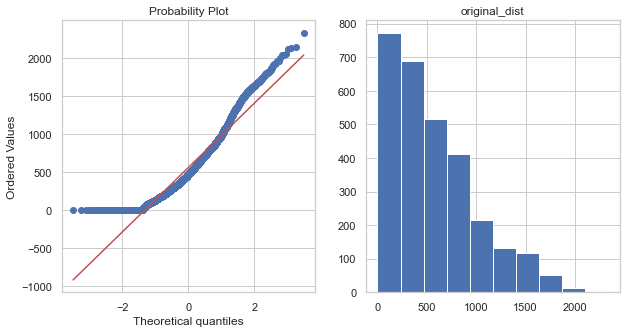

In [118]:
#check Distribution by QQ-plot
original_dist(df,"BsmtUnfSF")

In [119]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,"BsmtUnfSF")

(-657.5, 1682.5)

In [120]:
# In BsmtUnfSF more than 1660.5 value consider as outliers


df.loc[df["BsmtUnfSF"]>=1660.5,"BsmtUnfSF"] =1660.5

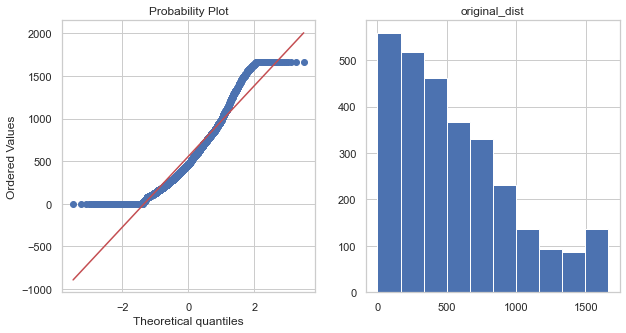

In [121]:
original_dist(df,"BsmtUnfSF")

# TotalBsmtSF Feature

In [122]:
df["TotalBsmtSF"].describe()

count    2919.000000
mean     1051.756252
std       440.692234
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

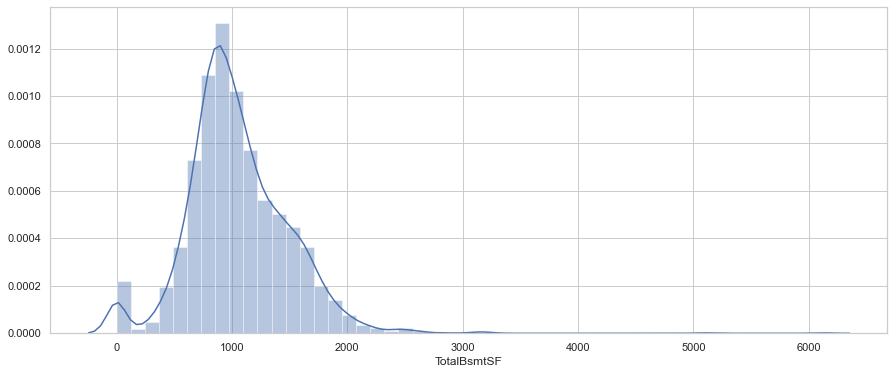

In [123]:
#check Distribution by Histogram.

histogram(df,"TotalBsmtSF")

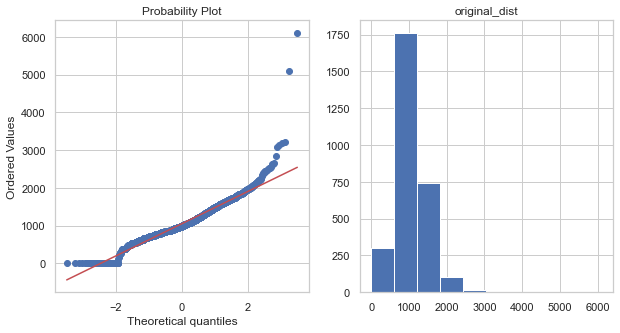

In [124]:
#check Distribution by QQ-plot.

original_dist(df,"TotalBsmtSF")

In [125]:
#TotalBsmtSF distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"TotalBsmtSF")

(-270.32044915724646, 2373.832953439535)

In [126]:
# In BsmtUnfSF more than 2241.592 value consider as outliers

df.loc[df["TotalBsmtSF"]>=2241.592,"TotalBsmtSF"] = 2241.592

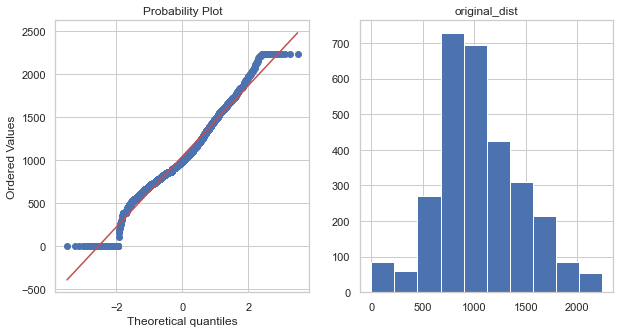

In [127]:
original_dist(df,"TotalBsmtSF")

# 1stFlrSF Feature

In [128]:
df["1stFlrSF"].describe()

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

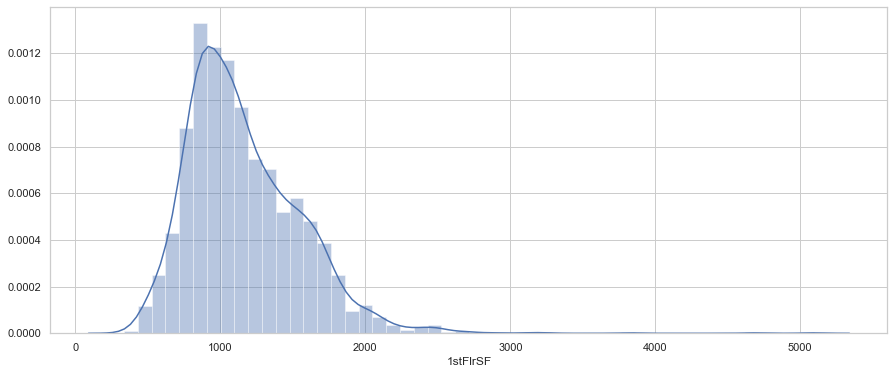

In [129]:
#check Distribution by Histogram.

histogram(df,"1stFlrSF")

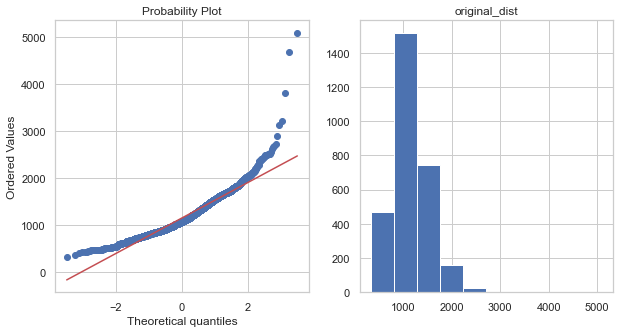

In [130]:
#check Distribution by QQ-plot.

original_dist(df,"1stFlrSF")

In [131]:
#1stFlrSF distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"1stFlrSF")

(-17.50452993604881, 2336.66794206349)

In [132]:
# In 1stFlrSF more than 2227.687 value consider as outliers

df.loc[df["1stFlrSF"]>=2227.687,"1stFlrSF"]=2227.687

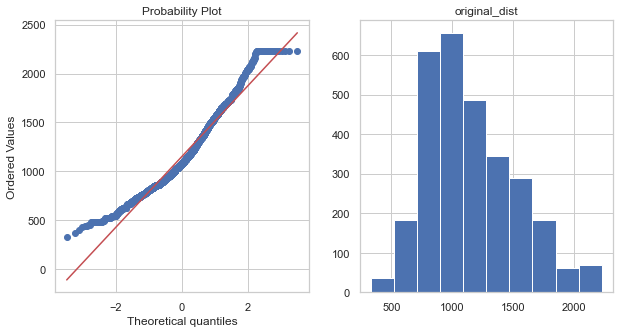

In [133]:
original_dist(df,"1stFlrSF")

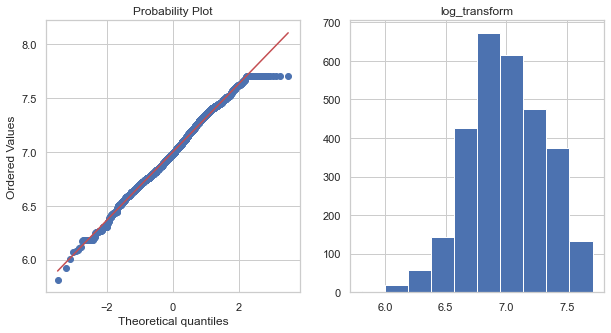

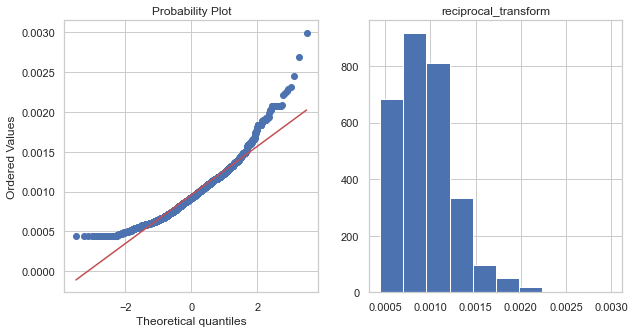

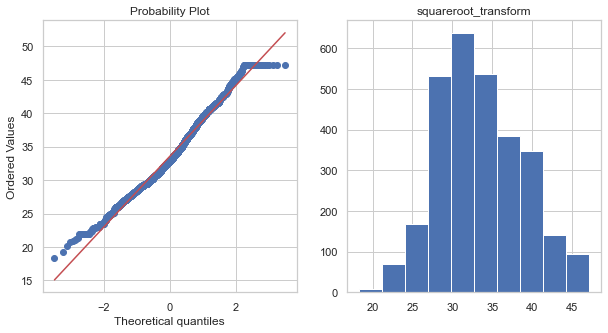

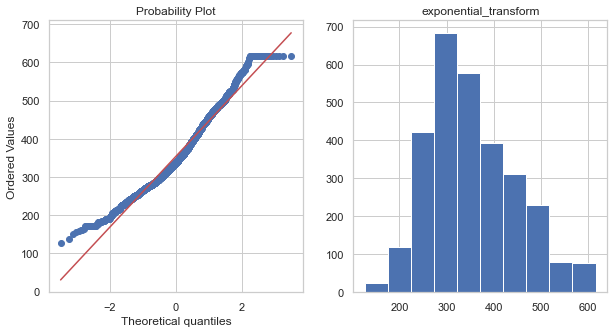

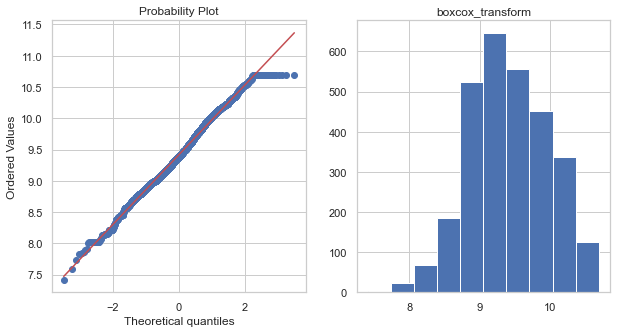

In [134]:
#Apply Some Transformation Techniques on 1stFlrSF for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"1stFlrSF")

reciprocal_transform(df,"1stFlrSF")

squareroot_transform(df,"1stFlrSF")

exponential_transform(df,"1stFlrSF")

boxcox_transform(df,"1stFlrSF")

After boxcox Transformation 1stFlrSF feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset

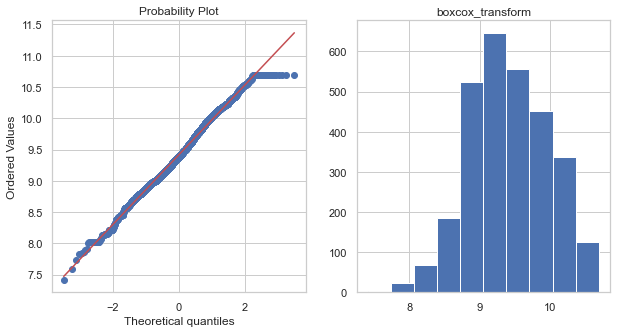

In [135]:
if 0 in df["1stFlrSF"].unique():
    pass
else:
    df["1stFlrSF"],parameter = stats.boxcox(df["1stFlrSF"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df["1stFlrSF"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    df["1stFlrSF"].hist()
    plt.title("boxcox_transform")

# 2ndFlrSF Feature

In [136]:
df["2ndFlrSF"].describe()

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

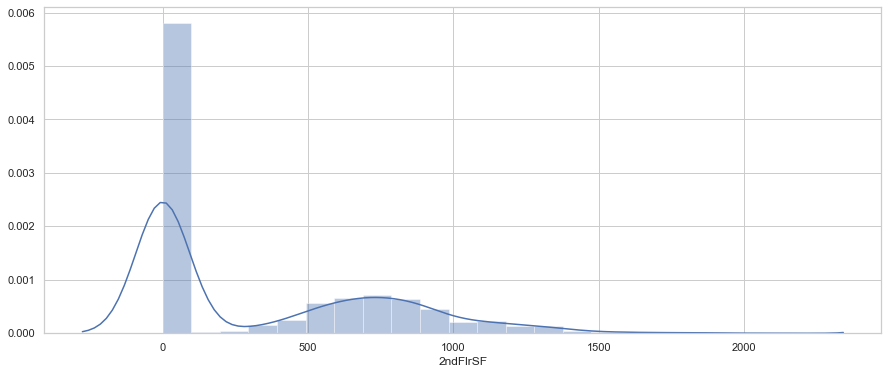

In [137]:
#check Distribution by Histogram.

histogram(df,"2ndFlrSF")

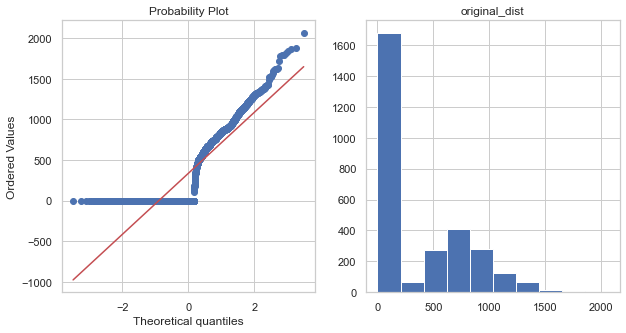

In [138]:
original_dist(df,"2ndFlrSF")

In [139]:
# 2ndFlrSF feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,"2ndFlrSF")

(-1056.0, 1760.0)

In [140]:
# In 2ndFlrSF more than 1740 value consider as outliers

df.loc[df["2ndFlrSF"]>=1740,"2ndFlrSF"]=1740

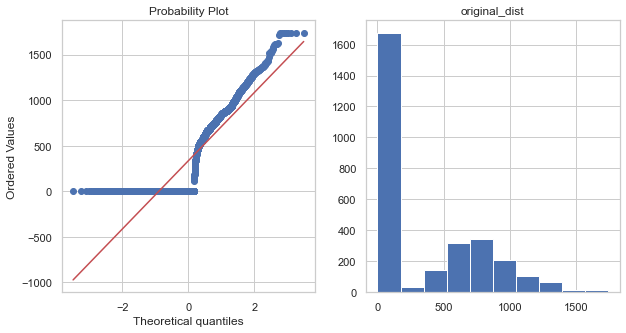

In [141]:
original_dist(df,"2ndFlrSF")

# LowQualFinSF Feature

In [142]:
df["LowQualFinSF"].describe()

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64

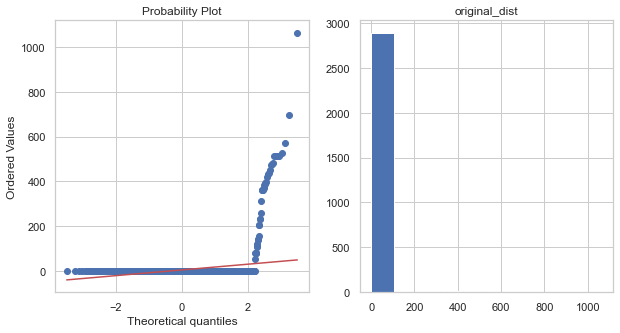

In [143]:
original_dist(df,"LowQualFinSF")

In [144]:
outlier_normally(df,"LowQualFinSF")

(-134.49605765367193, 143.88488944538142)

In [145]:
# In LowQualFinSF more than 430.367 value consider as outliers

df.loc[df["LowQualFinSF"]>=430.367,"LowQualFinSF"]=430.367

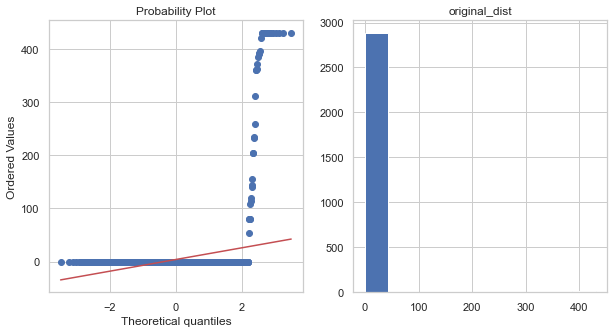

In [146]:
original_dist(df,"LowQualFinSF")

# GrLivArea Feature

In [147]:
df["GrLivArea"].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

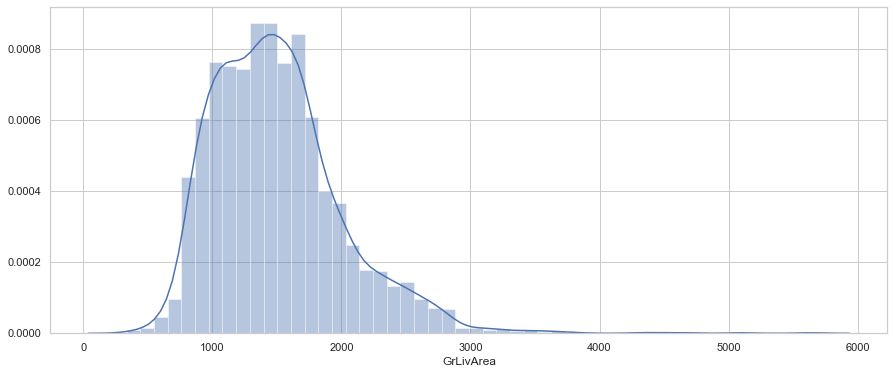

In [148]:
#check Distribution by Histogram.

histogram(df,"GrLivArea")

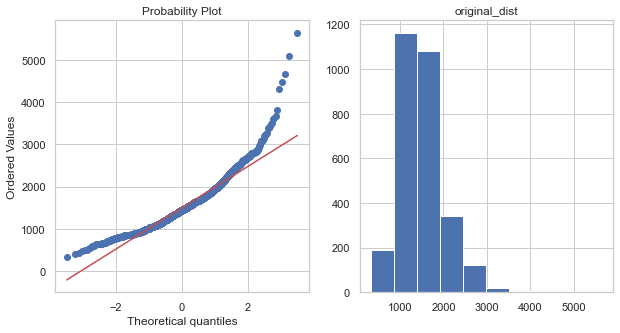

In [149]:
#check distribution by qq-plot
original_dist(df,"GrLivArea")

In [150]:
#GrLivArea distribution seems to normally distributed. so detect outliers (by mean-+3std)

outlier_normally(df,"GrLivArea")

(-17.393286091574055, 3018.912984618467)

In [151]:
# In GrLivArea more than 2901.945 value consider as outliers

df.loc[df["GrLivArea"]>=2901.945,"GrLivArea"]=2901.945

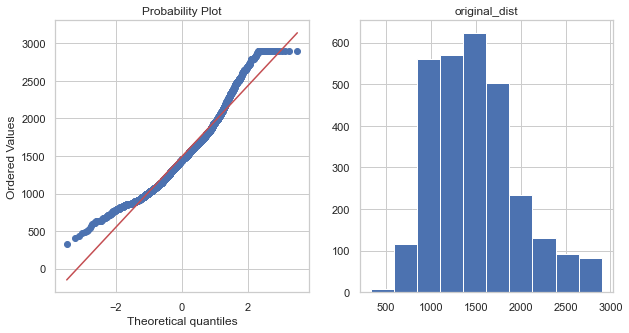

In [152]:
original_dist(df,"GrLivArea")

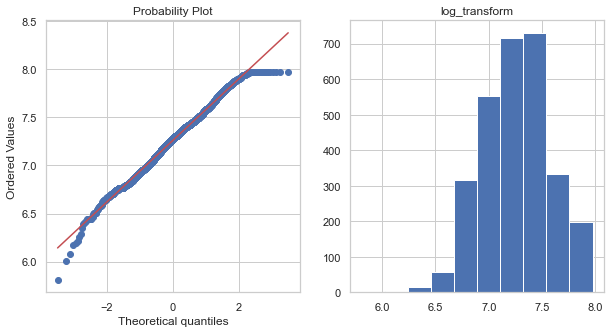

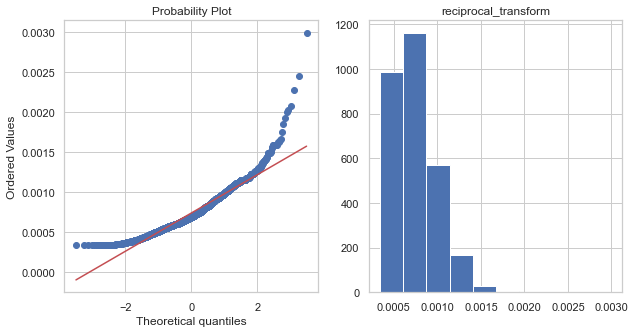

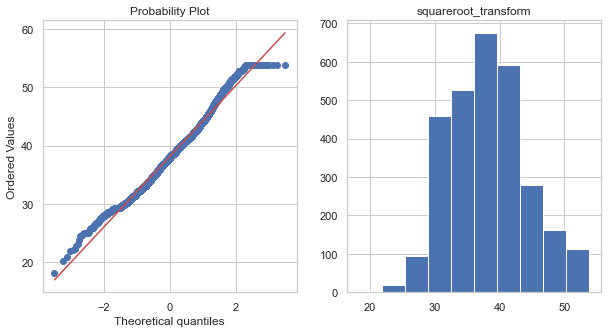

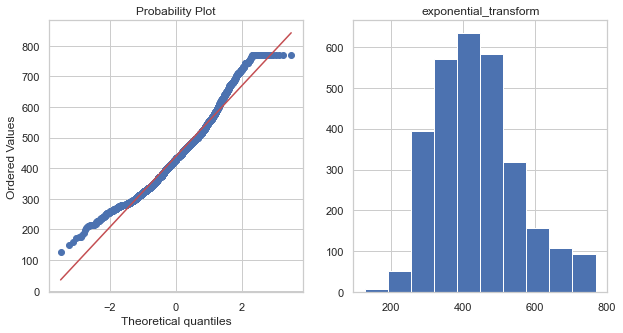

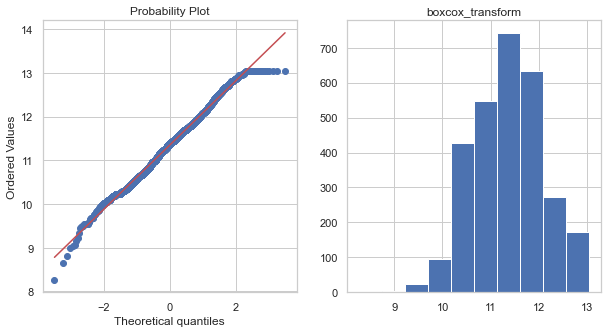

In [153]:
#Apply Some Transformation Techniques on GrLivArea for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"GrLivArea")

reciprocal_transform(df,"GrLivArea")

squareroot_transform(df,"GrLivArea")

exponential_transform(df,"GrLivArea")

boxcox_transform(df,"GrLivArea")

After boxcox Transformation GrLivArea feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset.

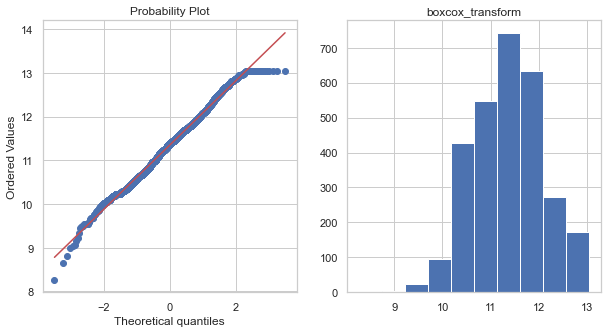

In [154]:
if 0 in df["GrLivArea"].unique():
    pass
else:
    df["GrLivArea"],parameter = stats.boxcox(df["GrLivArea"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df["GrLivArea"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    df["GrLivArea"].hist()
    plt.title("boxcox_transform")

# GarageArea Feature

In [155]:
df["GarageArea"].describe()

count    2919.000000
mean      472.877013
std       215.357944
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

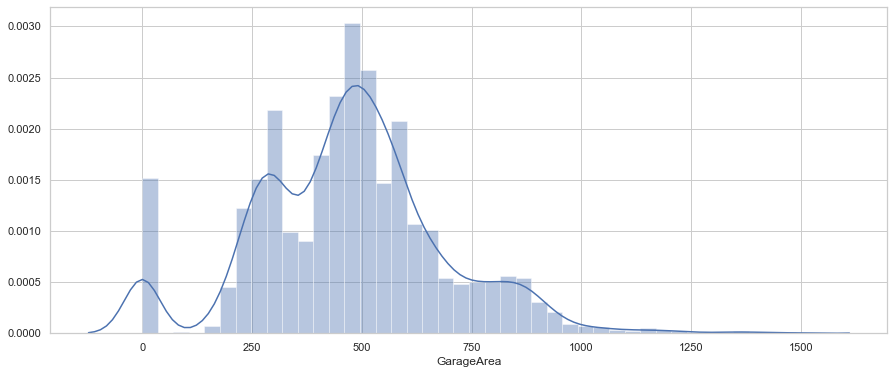

In [156]:
#check Distribution by Histogram.

histogram(df,"GarageArea")

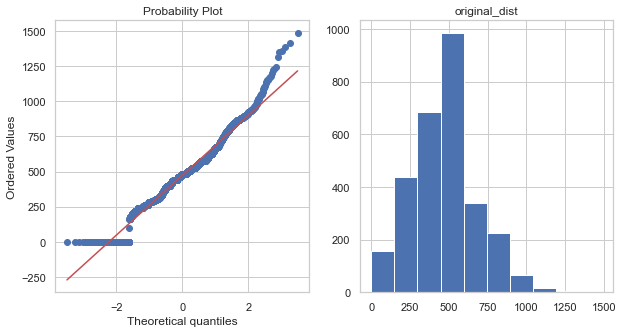

In [157]:
#check distribution by qq-plot
original_dist(df,"GarageArea")

In [158]:
#GarageArea distribution seems to normally distributed. so detect outliers (by mean-+3std)

outlier_normally(df,"GarageArea")

(-173.1968201059875, 1118.950845457135)

In [159]:
# In GarageArea more than 1130.9551 value consider as outliers

df.loc[df["GarageArea"]>=1130.9551,"GarageArea"] = 1130.9551

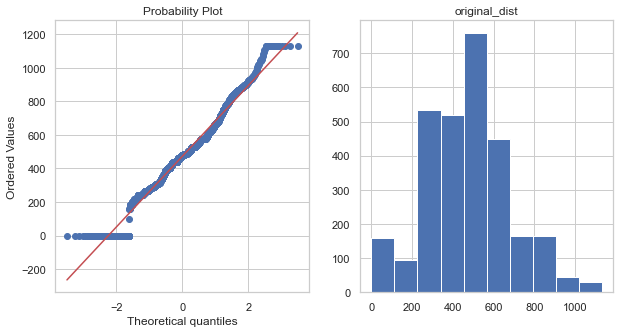

In [160]:
original_dist(df,"GarageArea")

# WoodDeckSF Feature

In [161]:
df['WoodDeckSF'].describe()

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

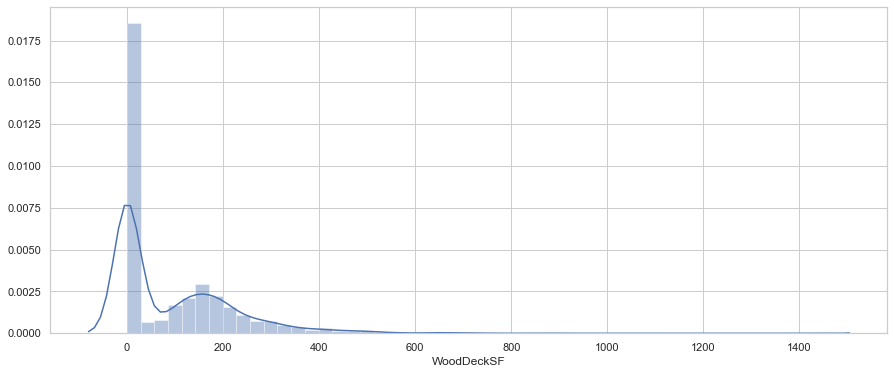

In [162]:
#check Distribution by Histogram.

histogram(df,"WoodDeckSF")

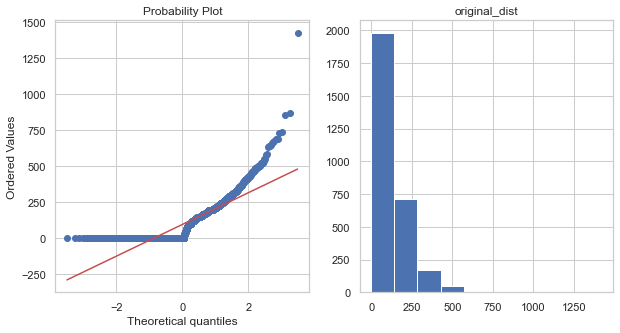

In [163]:
#check Distribution by qq-plot

original_dist(df,"WoodDeckSF")

In [164]:
# WoodDeckSF feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"WoodDeckSF")

(-504.0, 672.0)

In [165]:
# In WoodDeckSF more than 684 value consider as outliers

df.loc[df["WoodDeckSF"]>=684.0,"WoodDeckSF"] = 684.0

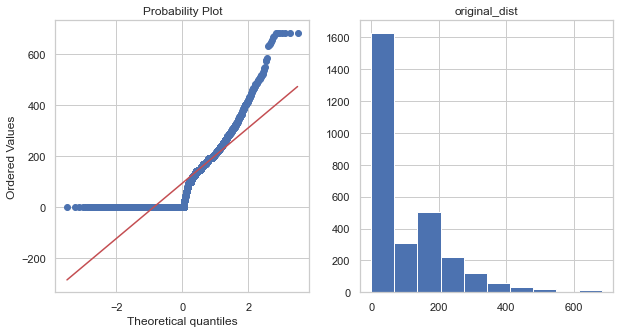

In [166]:
original_dist(df,"WoodDeckSF")

# OpenPorchSF feature

In [167]:
df['OpenPorchSF'].describe()

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

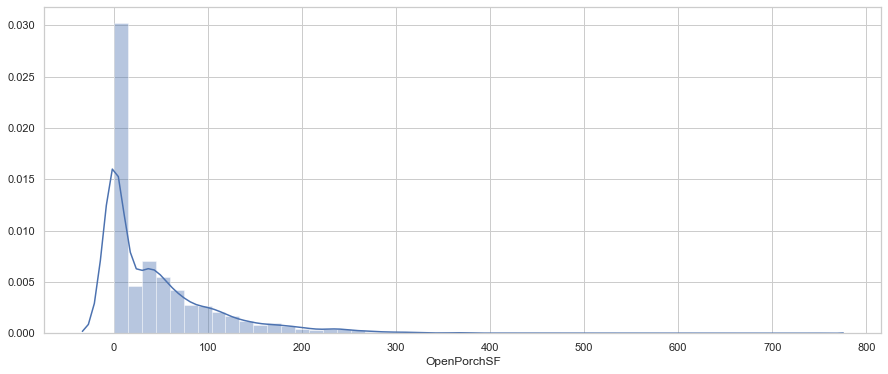

In [168]:
#check Distribution by Histogram.

histogram(df,"OpenPorchSF")

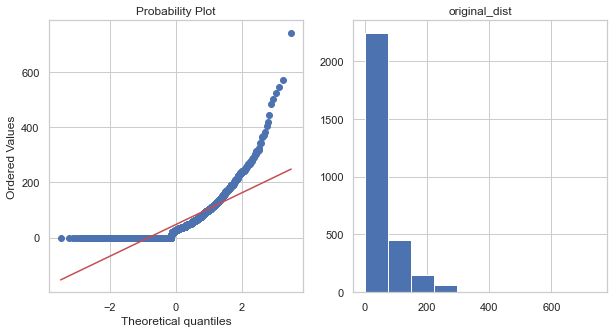

In [169]:
#check Distribution by qq-plot

original_dist(df,"OpenPorchSF")

In [170]:
# OpenPorchSF feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"OpenPorchSF")

(-210.0, 280.0)

In [171]:
# In OpenPorchSF more than 294.0 value consider as outliers

df.loc[df["OpenPorchSF"]>=294.0,"OpenPorchSF"] = 294.0

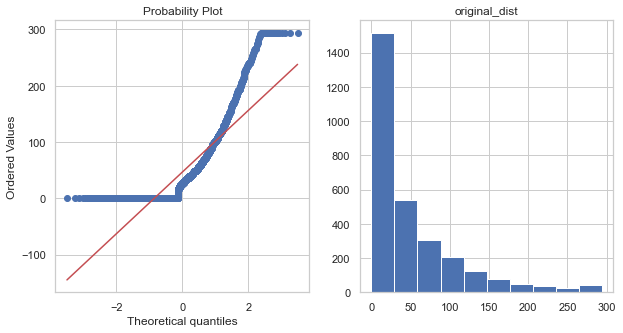

In [172]:
original_dist(df,"OpenPorchSF")

# EnclosedPorch Feature

In [173]:
df['EnclosedPorch'].describe()

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

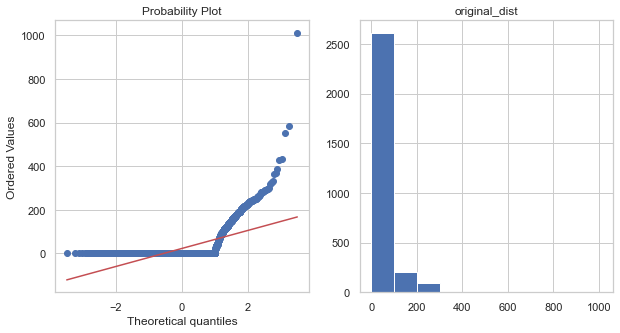

In [174]:
#check Distribution by qq-plot

original_dist(df,"EnclosedPorch")

In [175]:
outlier_normally(df,"EnclosedPorch")

(-169.6344154349743, 215.83105812082562)

In [176]:
# In EnclosedPorch more than 462.907 value consider as outliers

df.loc[df["EnclosedPorch"]>=462.907,"EnclosedPorch"] = 462.907

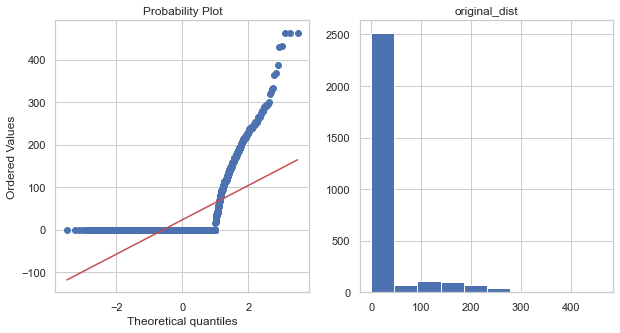

In [177]:
original_dist(df,"EnclosedPorch")

# 3SsnPorch Feature

In [178]:
df['3SsnPorch'].describe()

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

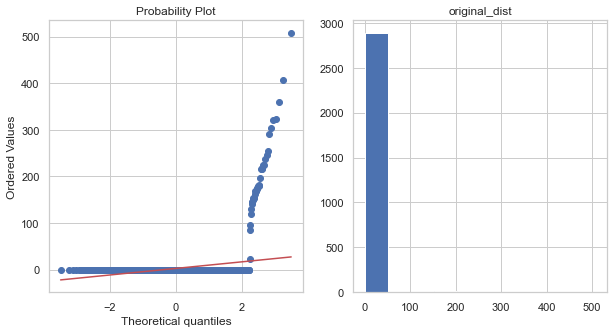

In [179]:
#check Distribution by qq-plot

original_dist(df,"3SsnPorch")

In [180]:
outlier_normally(df,"3SsnPorch")

(-72.96224694518752, 78.16676904179594)

In [181]:
# In 3SsnPorch more than 412.02 value consider as outliers

df.loc[df["3SsnPorch"] >= 412.02,"3SsnPorch"] = 412.02

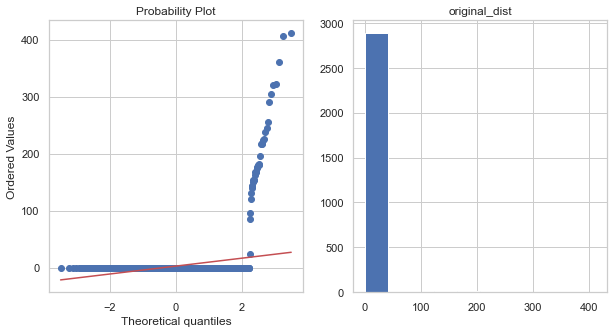

In [182]:
original_dist(df,"3SsnPorch")

# ScreenPorch Feature

In [183]:
df['ScreenPorch'].describe()

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

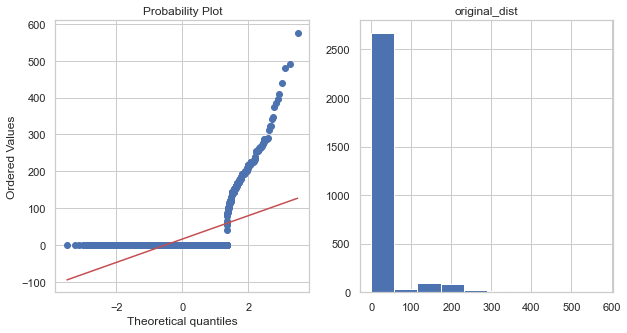

In [184]:
#check Distribution by qq-plot

original_dist(df,"ScreenPorch")

In [185]:
outlier_normally(df,"ScreenPorch")

(-152.49074521217938, 184.6154454519875)

In [186]:
# In ScreenPorch more than 446.727 value consider as outliers

df.loc[df["ScreenPorch"] >= 446.727,"ScreenPorch"] = 446.727

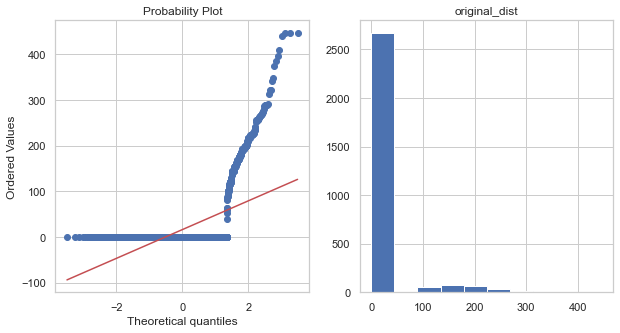

In [187]:
original_dist(df,"ScreenPorch")

# PoolArea feature

In [188]:
df['PoolArea'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

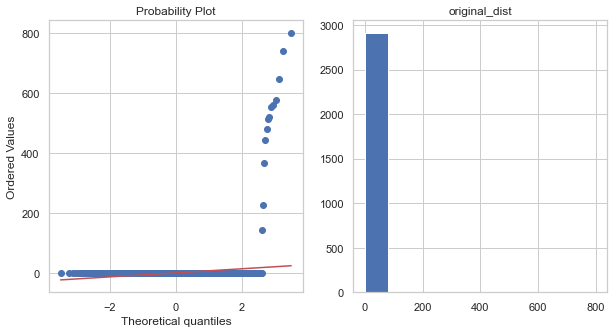

In [189]:
#check Distribution by qq-plot

original_dist(df,"PoolArea")

In [190]:
outlier_normally(df,"PoolArea")

(-104.74003933531296, 109.24363645761511)

In [191]:
# In PoolArea more than 416.667 value consider as outliers

df.loc[df["PoolArea"] >= 416.667,"PoolArea"] = 416.667

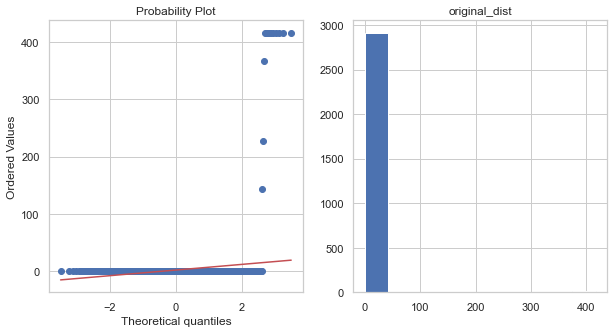

In [192]:
original_dist(df,"PoolArea")

# MiscVal Feature

In [193]:
df['MiscVal'].describe()

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

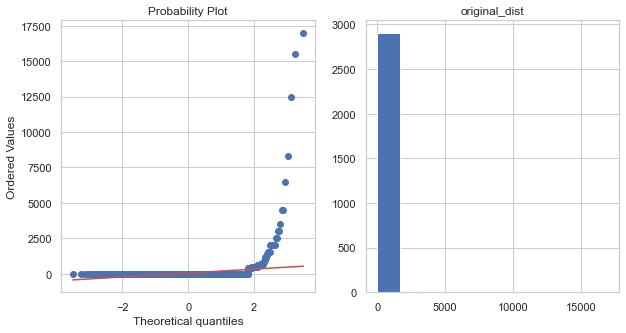

In [194]:
#check Distribution by qq-plot

original_dist(df,"MiscVal")

In [195]:
outlier_normally(df,"MiscVal")

(-1651.380663853399, 1753.0325994477805)

In [196]:
# In MiscVal more than 1527.278value consider as outliers

df.loc[df["MiscVal"] >= 1527.278,"MiscVal"] = 1527.278

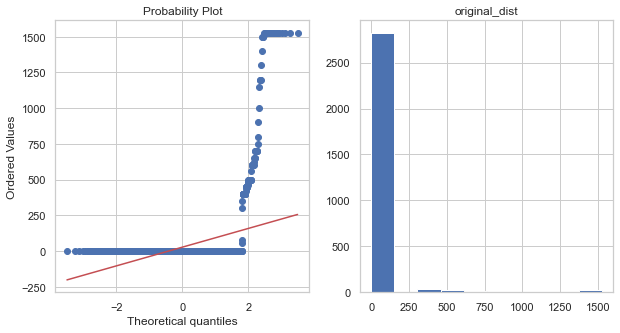

In [197]:
original_dist(df,"MiscVal")

In [198]:
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Encoding on Categorical Features

In [199]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [200]:
# Assing ordinal and nominal categorical features in different variables.
ordinal_features = ['Alley','Street', 'LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'LandContour', 'ExterCond', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
                    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType','GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence']


nominal_features = ['LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'MiscFeature','SaleType', 
                    'SaleCondition', 'MSZoning', 'BldgType','MiscFeature']


# Handle ordinal_features

In [201]:
# Street column has  contain Ordianl values
Street = {'Grvl': 1, 'Pave': 2}
df["Street"] = df["Street"].map(Street)

In [202]:
# LotShape column has  contain Ordianl values
Lot_Shape = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
df["LotShape"] = df["LotShape"].map(Lot_Shape)

In [203]:
# Utilities column has  contain Ordianl values
Utilities = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
df["Utilities"] = df["Utilities"].map(Utilities)

In [204]:
# LandSlope column has  contain Ordianl values
Land_Slope = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
df["LandSlope"] = df["LandSlope"].map(Land_Slope)

In [205]:
# LandContour column has  contain Ordianl values
Land_Contour = {'Low': 1, 'HLS':2 , 'Bnk': 3, 'Lvl': 4}
df["LandContour"] = df["LandContour"].map(Land_Contour)

In [206]:
# CentralAir column has  contain Ordianl values
Central_Air = {'N': 1, 'Y': 2}
df["CentralAir"] = df["CentralAir"].map(Central_Air)

In [207]:
# Electrical column has  contain Ordianl values
Electrical = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}
df["Electrical"] = df["Electrical"].map(Electrical)

In [208]:
# Functional column has  contain Ordianl values
Functional =  {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
df["Functional"] = df["Functional"].map(Functional)

In [209]:
# GarageType column has  contain Ordianl values
Garage_Type =  {'NA': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6}
df["GarageType"] = df["GarageType"].map(Garage_Type)

In [210]:
# PavedDrive column has  contain Ordianl values
Paved_Drive =  {'N': 1, 'P': 2, 'Y': 3}
df["PavedDrive"] = df["PavedDrive"].map(Paved_Drive)

In [211]:
# ExterQual column has  contain Ordianl values
Exterior_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'NA':0}
df["ExterQual"] = df["ExterQual"].map(Exterior_Quality)

In [212]:
# ExterCond column has  contain Ordianl values
Exterior_condition = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["ExterCond"] = df["ExterCond"].map(Exterior_condition)

In [213]:
# BsmtQual column has  contain Ordianl values
Bsmt_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'NA':0}
df["BsmtQual"] = df["BsmtQual"].map(Bsmt_Quality)

In [214]:
# BsmtCond column has  contain Ordianl values
Bsmt_condition = {'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["BsmtCond"] = df["BsmtCond"].map(Bsmt_condition)

In [215]:
# BsmtExposure column has  contain Ordianl values
Bsmt_Exposure = {'Gd':4 ,'Av':3,'Mn':2,'No':1, 'NA':0}
df["BsmtExposure"] = df["BsmtExposure"].map(Bsmt_Exposure)

In [216]:
# BsmtFinType1 column has  contain Ordianl values
Bsmt_FinType1 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':0}
df["BsmtFinType1"] = df["BsmtFinType1"].map(Bsmt_FinType1)

In [217]:
# BsmtFinType2 column has  contain Ordianl values
Bsmt_FinType2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NA':0}
df["BsmtFinType2"] = df["BsmtFinType2"].map(Bsmt_FinType2)

In [218]:
# HeatingQC column has  contain Ordianl values
Heating_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1}
df["HeatingQC"] = df["HeatingQC"].map(Heating_Quality)

In [219]:
# KitchenQual column has  contain Ordianl values
Kitchen_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1}
df["KitchenQual"] = df["KitchenQual"].map(Kitchen_Quality)

In [220]:
# FireplaceQu column has  contain Ordianl values
Fireplace_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["FireplaceQu"] = df["FireplaceQu"].map(Fireplace_Quality)

In [221]:
# GarageFinish column has  contain Ordianl values
Garage_Finish = {'RFn':2, 'Unf':1 ,'Fin':3, 'NA':0}
df["GarageFinish"] = df["GarageFinish"].map(Garage_Finish)

In [222]:
# GarageQual column has  contain Ordianl values
Garage_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["GarageQual"] = df["GarageQual"].map(Garage_Quality)

In [223]:
# GarageCond column has  contain Ordianl values
Garage_Cond = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["GarageCond"] = df["GarageCond"].map(Garage_Cond)

In [224]:
# Alley column has  contain Ordianl values
Alley = {'NA': 0, 'Grvl': 1, 'Pave': 2}
df["Alley"] = df["Alley"].map(Alley)

In [225]:
# PoolQC column has  contain Ordianl values
Pool_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["PoolQC"] = df["PoolQC"].map(Pool_Quality)

In [226]:
# Fence column has  contain Ordianl values
Fence = {'GdPrv':4 ,'MnPrv':3,'GdWo':2 ,'MnWw':1, 'NA':0}
df["Fence"] = df["Fence"].map(Fence)

In [227]:
#Rest of Categorical features change into Dummies variables.

df = pd.get_dummies(df)
df

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0             60        65.00   83.374247       2      0         4   
1             20        80.00   87.734482       2      0         4   
2             60        68.00   93.463938       2      0         3   
3             70        60.00   87.551771       2      0         3   
4             60        84.00  102.713412       2      0         3   
...          ...          ...         ...     ...    ...       ...   
1454         160        21.00   45.959162       2      0         4   
1455         160        21.00   45.548057       2      0         4   
1456          20       138.36  117.473293       2      0         4   
1457          85        62.00   90.724159       2      0         4   
1458          60        74.00   87.832904       2      0         4   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0               4          4          3            7            5       2003   
1               4          4          3            6            8       1976   
2               4          4          3            7            5       2001   
3               4          4          3            7            5       1915   
4               4          4          3            8            5       2000   
...           ...        ...        ...          ...          ...        ...   
1454            4          4          3            4            7       1970   
1455            4          4          3            4            5       1970   
1456            4          4          3            5            7       1960   
1457            4          4          3            5            5       1992   
1458            4          4          2            7            5       1993   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             2003       196.0          3          3         3         3   
1             1976         0.0          2          3         3         3   
2             2002       162.0          3          3         3         3   
3             1970         0.0          2          3         2         4   
4             2000       350.0          3          3         3         3   
...            ...         ...        ...        ...       ...       ...   
1454          1970         0.0          2          3         2         3   
1455          1970         0.0          2          3         2         3   
1456          1996         0.0          2          3         2         3   
1457          1992         0.0          2          3         3         3   
1458          1994        94.0          2          3         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0                1             6       706.0             1         0.0   
1                4             5       978.0             1         0.0   
2                2             6       486.0             1         0.0   
3                1             5       216.0             1         0.0   
4                3             6       655.0             1         0.0   
...            ...           ...         ...           ...         ...   
1454             1             1         0.0             1         0.0   
1455             1             3       252.0             1         0.0   
1456             1             5      1224.0             1         0.0   
1457             3             6       337.0             1         0.0   
1458             3             2       758.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0         150.0        856.0          5           2           5  8.977671   
1         284.0       1262.0          5           2           5  9.657753   
2         434.0        920.0          5           2           5  9.102387   
3         540.0        756.0          4           2           5  9.178156   
4         490.0  

# Split Train and Test Datasets

In [228]:
train = df.iloc[:1460,:]
train

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0             60         65.0   83.374247       2      0         4   
1             20         80.0   87.734482       2      0         4   
2             60         68.0   93.463938       2      0         3   
3             70         60.0   87.551771       2      0         3   
4             60         84.0  102.713412       2      0         3   
...          ...          ...         ...     ...    ...       ...   
1455          60         62.0   81.229641       2      0         4   
1456          20         85.0   99.531045       2      0         4   
1457          70         66.0   85.661289       2      0         4   
1458          20         68.0   88.159761       2      0         4   
1459          20         75.0   88.951019       2      0         4   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0               4          4          3            7            5       2003   
1               4          4          3            6            8       1976   
2               4          4          3            7            5       2001   
3               4          4          3            7            5       1915   
4               4          4          3            8            5       2000   
...           ...        ...        ...          ...          ...        ...   
1455            4          4          3            6            5       1999   
1456            4          4          3            6            6       1978   
1457            4          4          3            7            9       1941   
1458            4          4          3            5            6       1950   
1459            4          4          3            5            6       1965   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             2003       196.0          3          3         3         3   
1             1976         0.0          2          3         3         3   
2             2002       162.0          3          3         3         3   
3             1970         0.0          2          3         2         4   
4             2000       350.0          3          3         3         3   
...            ...         ...        ...        ...       ...       ...   
1455          2000         0.0          2          3         3         3   
1456          1988       119.0          2          3         3         3   
1457          2006         0.0          4          4         2         4   
1458          1996         0.0          2          3         2         3   
1459          1965         0.0          3          3         2         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0                1             6       706.0             1       0.000   
1                4             5       978.0             1       0.000   
2                2             6       486.0             1       0.000   
3                1             5       216.0             1       0.000   
4                3             6       655.0             1       0.000   
...            ...           ...         ...           ...         ...   
1455             1             1         0.0             1       0.000   
1456             1             5       790.0             3     163.000   
1457             1             6       275.0             1       0.000   
1458             2             6        49.0             3     687.279   
1459             1             4       830.0             2     290.000   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical   1stFlrSF  \
0         150.0        856.0          5           2           5   8.977671   
1         284.0       1262.0          5           2           5   9.657753   
2         434.0        920.0          5           2           5   9.102387   
3         540.0        756.0          4           2           5   9.178156   
4         49

In [229]:
test= df.iloc[1460:,:]
test

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0             20        80.00   94.683303       2      0         4   
1             20        81.00  102.733454       2      0         3   
2             60        74.00  101.470556       2      0         3   
3             60        78.00   89.097292       2      0         3   
4            120        43.00   67.575250       2      0         3   
...          ...          ...         ...     ...    ...       ...   
1454         160        21.00   45.959162       2      0         4   
1455         160        21.00   45.548057       2      0         4   
1456          20       138.36  117.473293       2      0         4   
1457          85        62.00   90.724159       2      0         4   
1458          60        74.00   87.832904       2      0         4   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0               4          4          3            5            6       1961   
1               4          4          3            6            6       1958   
2               4          4          3            5            5       1997   
3               4          4          3            6            6       1998   
4               2          4          3            8            5       1992   
...           ...        ...        ...          ...          ...        ...   
1454            4          4          3            4            7       1970   
1455            4          4          3            4            5       1970   
1456            4          4          3            5            7       1960   
1457            4          4          3            5            5       1992   
1458            4          4          2            7            5       1993   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             1961         0.0          2          3         2         3   
1             1958       108.0          2          3         2         3   
2             1998         0.0          2          3         3         3   
3             1998        20.0          2          3         2         3   
4             1992         0.0          3          3         3         3   
...            ...         ...        ...        ...       ...       ...   
1454          1970         0.0          2          3         2         3   
1455          1970         0.0          2          3         2         3   
1456          1996         0.0          2          3         2         3   
1457          1992         0.0          2          3         3         3   
1458          1994        94.0          2          3         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0                1             3       468.0             2       144.0   
1                1             5       923.0             1         0.0   
2                1             6       791.0             1         0.0   
3                1             6       602.0             1         0.0   
4                1             5       263.0             1         0.0   
...            ...           ...         ...           ...         ...   
1454             1             1         0.0             1         0.0   
1455             1             3       252.0             1         0.0   
1456             1             5      1224.0             1         0.0   
1457             3             6       337.0             1         0.0   
1458             3             2       758.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0         270.0        882.0          3           2           5  9.056581   
1         406.0       1329.0          3           2           5  9.750000   
2         137.0        928.0          4           2           5  9.117412   
3         324.0        926.0          5           2           5  9.113667   
4        1017.0  

In [230]:
#Split Independent features and Dependent features from train dataset.
df_x = train.drop(["SalePrice"],axis=1)
df_y = train["SalePrice"]

In [231]:
test= test.drop(["SalePrice"],axis=1)
test

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0             20        80.00   94.683303       2      0         4   
1             20        81.00  102.733454       2      0         3   
2             60        74.00  101.470556       2      0         3   
3             60        78.00   89.097292       2      0         3   
4            120        43.00   67.575250       2      0         3   
...          ...          ...         ...     ...    ...       ...   
1454         160        21.00   45.959162       2      0         4   
1455         160        21.00   45.548057       2      0         4   
1456          20       138.36  117.473293       2      0         4   
1457          85        62.00   90.724159       2      0         4   
1458          60        74.00   87.832904       2      0         4   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0               4          4          3            5            6       1961   
1               4          4          3            6            6       1958   
2               4          4          3            5            5       1997   
3               4          4          3            6            6       1998   
4               2          4          3            8            5       1992   
...           ...        ...        ...          ...          ...        ...   
1454            4          4          3            4            7       1970   
1455            4          4          3            4            5       1970   
1456            4          4          3            5            7       1960   
1457            4          4          3            5            5       1992   
1458            4          4          2            7            5       1993   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             1961         0.0          2          3         2         3   
1             1958       108.0          2          3         2         3   
2             1998         0.0          2          3         3         3   
3             1998        20.0          2          3         2         3   
4             1992         0.0          3          3         3         3   
...            ...         ...        ...        ...       ...       ...   
1454          1970         0.0          2          3         2         3   
1455          1970         0.0          2          3         2         3   
1456          1996         0.0          2          3         2         3   
1457          1992         0.0          2          3         3         3   
1458          1994        94.0          2          3         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0                1             3       468.0             2       144.0   
1                1             5       923.0             1         0.0   
2                1             6       791.0             1         0.0   
3                1             6       602.0             1         0.0   
4                1             5       263.0             1         0.0   
...            ...           ...         ...           ...         ...   
1454             1             1         0.0             1         0.0   
1455             1             3       252.0             1         0.0   
1456             1             5      1224.0             1         0.0   
1457             3             6       337.0             1         0.0   
1458             3             2       758.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0         270.0        882.0          3           2           5  9.056581   
1         406.0       1329.0          3           2           5  9.750000   
2         137.0        928.0          4           2           5  9.117412   
3         324.0        926.0          5           2           5  9.113667   
4        1017.0  

# FeatureSelection

#feature Selection by Lasso Rigression

In [232]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [233]:
selection = SelectFromModel(Lasso(max_iter=10000))
selection.fit(df_x,df_y)

SelectFromModel(estimator=Lasso(max_iter=10000))

In [234]:
#Important Feature Selected by Lasso Regression 
feature_name = df_x.columns[selection.get_support()]
feature_name

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=196)

In [235]:
#Apply Transformation on train Independent Datasets.

selection_df_x = selection.transform(df_x)
df_x = pd.DataFrame(selection_df_x,columns=feature_name)
df_x

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0           60.0         65.0   83.374247     2.0    0.0       4.0   
1           20.0         80.0   87.734482     2.0    0.0       4.0   
2           60.0         68.0   93.463938     2.0    0.0       3.0   
3           70.0         60.0   87.551771     2.0    0.0       3.0   
4           60.0         84.0  102.713412     2.0    0.0       3.0   
...          ...          ...         ...     ...    ...       ...   
1455        60.0         62.0   81.229641     2.0    0.0       4.0   
1456        20.0         85.0   99.531045     2.0    0.0       4.0   
1457        70.0         66.0   85.661289     2.0    0.0       4.0   
1458        20.0         68.0   88.159761     2.0    0.0       4.0   
1459        20.0         75.0   88.951019     2.0    0.0       4.0   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0             4.0        4.0        3.0          7.0          5.0     2003.0   
1             4.0        4.0        3.0          6.0          8.0     1976.0   
2             4.0        4.0        3.0          7.0          5.0     2001.0   
3             4.0        4.0        3.0          7.0          5.0     1915.0   
4             4.0        4.0        3.0          8.0          5.0     2000.0   
...           ...        ...        ...          ...          ...        ...   
1455          4.0        4.0        3.0          6.0          5.0     1999.0   
1456          4.0        4.0        3.0          6.0          6.0     1978.0   
1457          4.0        4.0        3.0          7.0          9.0     1941.0   
1458          4.0        4.0        3.0          5.0          6.0     1950.0   
1459          4.0        4.0        3.0          5.0          6.0     1965.0   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0           2003.0       196.0        3.0        3.0       3.0       3.0   
1           1976.0         0.0        2.0        3.0       3.0       3.0   
2           2002.0       162.0        3.0        3.0       3.0       3.0   
3           1970.0         0.0        2.0        3.0       2.0       4.0   
4           2000.0       350.0        3.0        3.0       3.0       3.0   
...            ...         ...        ...        ...       ...       ...   
1455        2000.0         0.0        2.0        3.0       3.0       3.0   
1456        1988.0       119.0        2.0        3.0       3.0       3.0   
1457        2006.0         0.0        4.0        4.0       2.0       4.0   
1458        1996.0         0.0        2.0        3.0       2.0       3.0   
1459        1965.0         0.0        3.0        3.0       2.0       3.0   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0              1.0           6.0       706.0           1.0       0.000   
1              4.0           5.0       978.0           1.0       0.000   
2              2.0           6.0       486.0           1.0       0.000   
3              1.0           5.0       216.0           1.0       0.000   
4              3.0           6.0       655.0           1.0       0.000   
...            ...           ...         ...           ...         ...   
1455           1.0           1.0         0.0           1.0       0.000   
1456           1.0           5.0       790.0           3.0     163.000   
1457           1.0           6.0       275.0           1.0       0.000   
1458           2.0           6.0        49.0           3.0     687.279   
1459           1.0           4.0       830.0           2.0     290.000   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical   1stFlrSF  \
0         150.0        856.0        5.0         2.0         5.0   8.977671   
1         284.0       1262.0        5.0         2.0         5.0   9.657753   
2         434.0        920.0        5.0         2.0         5.0   9.102387   
3         540.0        756.0        4.0         2.0         5.0   9.178156   
4         49

In [236]:
#Similarly Apply Transformation on Test Datasets.

selection_test = selection.transform(test)
test = pd.DataFrame(selection_test,columns = feature_name)
test

MSSubClass  LotFrontage     LotArea  Street  Alley  LotShape  \
0           20.0        80.00   94.683303     2.0    0.0       4.0   
1           20.0        81.00  102.733454     2.0    0.0       3.0   
2           60.0        74.00  101.470556     2.0    0.0       3.0   
3           60.0        78.00   89.097292     2.0    0.0       3.0   
4          120.0        43.00   67.575250     2.0    0.0       3.0   
...          ...          ...         ...     ...    ...       ...   
1454       160.0        21.00   45.959162     2.0    0.0       4.0   
1455       160.0        21.00   45.548057     2.0    0.0       4.0   
1456        20.0       138.36  117.473293     2.0    0.0       4.0   
1457        85.0        62.00   90.724159     2.0    0.0       4.0   
1458        60.0        74.00   87.832904     2.0    0.0       4.0   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0             4.0        4.0        3.0          5.0          6.0     1961.0   
1             4.0        4.0        3.0          6.0          6.0     1958.0   
2             4.0        4.0        3.0          5.0          5.0     1997.0   
3             4.0        4.0        3.0          6.0          6.0     1998.0   
4             2.0        4.0        3.0          8.0          5.0     1992.0   
...           ...        ...        ...          ...          ...        ...   
1454          4.0        4.0        3.0          4.0          7.0     1970.0   
1455          4.0        4.0        3.0          4.0          5.0     1970.0   
1456          4.0        4.0        3.0          5.0          7.0     1960.0   
1457          4.0        4.0        3.0          5.0          5.0     1992.0   
1458          4.0        4.0        2.0          7.0          5.0     1993.0   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0           1961.0         0.0        2.0        3.0       2.0       3.0   
1           1958.0       108.0        2.0        3.0       2.0       3.0   
2           1998.0         0.0        2.0        3.0       3.0       3.0   
3           1998.0        20.0        2.0        3.0       2.0       3.0   
4           1992.0         0.0        3.0        3.0       3.0       3.0   
...            ...         ...        ...        ...       ...       ...   
1454        1970.0         0.0        2.0        3.0       2.0       3.0   
1455        1970.0         0.0        2.0        3.0       2.0       3.0   
1456        1996.0         0.0        2.0        3.0       2.0       3.0   
1457        1992.0         0.0        2.0        3.0       3.0       3.0   
1458        1994.0        94.0        2.0        3.0       3.0       3.0   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0              1.0           3.0       468.0           2.0       144.0   
1              1.0           5.0       923.0           1.0         0.0   
2              1.0           6.0       791.0           1.0         0.0   
3              1.0           6.0       602.0           1.0         0.0   
4              1.0           5.0       263.0           1.0         0.0   
...            ...           ...         ...           ...         ...   
1454           1.0           1.0         0.0           1.0         0.0   
1455           1.0           3.0       252.0           1.0         0.0   
1456           1.0           5.0      1224.0           1.0         0.0   
1457           3.0           6.0       337.0           1.0         0.0   
1458           3.0           2.0       758.0           1.0         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0         270.0        882.0        3.0         2.0         5.0  9.056581   
1         406.0       1329.0        3.0         2.0         5.0  9.750000   
2         137.0        928.0        4.0         2.0         5.0  9.117412   
3         324.0        926.0        5.0         2.0         5.0  9.113667   
4        1017.0  

# Feature Scaling

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaling = StandardScaler()
scale_data = scaling.fit_transform(df_x)

In [239]:
df_x = pd.DataFrame(scale_data,columns=df_x.columns)
df_x

MSSubClass  LotFrontage   LotArea    Street     Alley  LotShape  \
0       0.073375    -0.200929 -0.222435  0.064238 -0.243025  0.701291   
1      -0.872563     0.491263  0.047219  0.064238 -0.243025  0.701291   
2       0.073375    -0.062491  0.401551  0.064238 -0.243025 -1.016637   
3       0.309859    -0.431660  0.035919  0.064238 -0.243025 -1.016637   
4       0.073375     0.675847  0.973576  0.064238 -0.243025 -1.016637   
...          ...          ...       ...       ...       ...       ...   
1455    0.073375    -0.339367 -0.355067  0.064238 -0.243025  0.701291   
1456   -0.872563     0.721993  0.776766  0.064238 -0.243025  0.701291   
1457    0.309859    -0.154783 -0.080996  0.064238 -0.243025  0.701291   
1458   -0.872563    -0.062491  0.073520  0.064238 -0.243025  0.701291   
1459   -0.872563     0.260532  0.122454  0.064238 -0.243025  0.701291   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0        0.306146    0.02618   0.225716     0.651479    -0.517200   1.050994   
1        0.306146    0.02618   0.225716    -0.071836     2.179628   0.156734   
2        0.306146    0.02618   0.225716     0.651479    -0.517200   0.984752   
3        0.306146    0.02618   0.225716     0.651479    -0.517200  -1.863632   
4        0.306146    0.02618   0.225716     1.374795    -0.517200   0.951632   
...           ...        ...        ...          ...          ...        ...   
1455     0.306146    0.02618   0.225716    -0.071836    -0.517200   0.918511   
1456     0.306146    0.02618   0.225716    -0.071836     0.381743   0.222975   
1457     0.306146    0.02618   0.225716     0.651479     3.078570  -1.002492   
1458     0.306146    0.02618   0.225716    -0.795151     0.381743  -0.704406   
1459     0.306146    0.02618   0.225716    -0.795151     0.381743  -0.207594   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0         0.878668    0.609517   1.052302  -0.238112  0.618960  0.117884   
1        -0.429577   -0.616388  -0.689604  -0.238112  0.618960  0.117884   
2         0.830215    0.396860   1.052302  -0.238112  0.618960  0.117884   
3        -0.720298   -0.616388  -0.689604  -0.238112 -0.655627  1.929579   
4         0.733308    1.572728   1.052302  -0.238112  0.618960  0.117884   
...            ...         ...        ...        ...       ...       ...   
1455      0.733308   -0.616388  -0.689604  -0.238112  0.618960  0.117884   
1456      0.151865    0.127911  -0.689604  -0.238112  0.618960  0.117884   
1457      1.024029   -0.616388   2.794208   2.611429 -0.655627  1.929579   
1458      0.539493   -0.616388  -0.689604  -0.238112 -0.655627  0.117884   
1459     -0.962566   -0.616388   1.052302  -0.238112 -0.655627  0.117884   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0        -0.590555      1.164712    0.614444     -0.277189   -0.306252   
1         2.220999      0.690115    1.242664     -0.277189   -0.306252   
2         0.346630      1.164712    0.106325     -0.277189   -0.306252   
3        -0.590555      0.690115   -0.517276     -0.277189   -0.306252   
4         1.283814      1.164712    0.496653     -0.277189   -0.306252   
...            ...           ...         ...           ...         ...   
1455     -0.590555     -1.208270   -1.016157     -0.277189   -0.306252   
1456     -0.590555      0.690115    0.808453      1.964896    0.868575   
1457     -0.590555      1.164712   -0.381008     -0.277189   -0.306252   
1458      0.346630      1.164712   -0.902985      1.964896    4.647331   
1459     -0.590555      0.215519    0.900839      0.843853    1.783931   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0     -0.960553    -0.480717   0.891179    0.263813    0.279513 -0.815103   
1     -0.649093     0.518135   0.891179    0.263813    0.279513  0.420468   
2     -0.300445    -0.323263   0.891179    0.263813    0.279513 -0.588519   
3     -0.054067    -0.726740  -0.151386    0.263813    0.2

In [240]:
#similarly apply scaling on test data
test_data = scaling.transform(test)

test = pd.DataFrame(test_data,columns=test.columns)
test

MSSubClass  LotFrontage   LotArea    Street     Alley  LotShape  \
0      -0.872563     0.491263  0.476962  0.064238 -0.243025  0.701291   
1      -0.872563     0.537409  0.974816  0.064238 -0.243025 -1.016637   
2       0.073375     0.214386  0.896713  0.064238 -0.243025 -1.016637   
3       0.073375     0.398970  0.131501  0.064238 -0.243025 -1.016637   
4       1.492282    -1.216144 -1.199509  0.064238 -0.243025 -1.016637   
...          ...          ...       ...       ...       ...       ...   
1454    2.438219    -2.231358 -2.536334  0.064238 -0.243025  0.701291   
1455    2.438219    -2.231358 -2.561759  0.064238 -0.243025  0.701291   
1456   -0.872563     3.184350  1.886386  0.064238 -0.243025  0.701291   
1457    0.664586    -0.339367  0.232113  0.064238 -0.243025  0.701291   
1458    0.073375     0.214386  0.053306  0.064238 -0.243025  0.701291   

      LandContour  Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
0        0.306146    0.02618   0.225716    -0.795151     0.381743  -0.340077   
1        0.306146    0.02618   0.225716    -0.071836     0.381743  -0.439440   
2        0.306146    0.02618   0.225716    -0.795151    -0.517200   0.852269   
3        0.306146    0.02618   0.225716    -0.071836     0.381743   0.885390   
4       -2.992544    0.02618   0.225716     1.374795    -0.517200   0.686666   
...           ...        ...        ...          ...          ...        ...   
1454     0.306146    0.02618   0.225716    -1.518467     1.280685  -0.041991   
1455     0.306146    0.02618   0.225716    -1.518467    -0.517200  -0.041991   
1456     0.306146    0.02618   0.225716    -0.795151     1.280685  -0.373198   
1457     0.306146    0.02618   0.225716    -0.795151    -0.517200   0.686666   
1458     0.306146    0.02618  -3.395664     0.651479    -0.517200   0.719786   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0        -1.156380   -0.616388  -0.689604  -0.238112 -0.655627  0.117884   
1        -1.301740    0.059110  -0.689604  -0.238112 -0.655627  0.117884   
2         0.636400   -0.616388  -0.689604  -0.238112  0.618960  0.117884   
3         0.636400   -0.491296  -0.689604  -0.238112 -0.655627  0.117884   
4         0.345679   -0.616388   1.052302  -0.238112  0.618960  0.117884   
...            ...         ...        ...        ...       ...       ...   
1454     -0.720298   -0.616388  -0.689604  -0.238112 -0.655627  0.117884   
1455     -0.720298   -0.616388  -0.689604  -0.238112 -0.655627  0.117884   
1456      0.539493   -0.616388  -0.689604  -0.238112 -0.655627  0.117884   
1457      0.345679   -0.616388  -0.689604  -0.238112  0.618960  0.117884   
1458      0.442586   -0.028454  -0.689604  -0.238112  0.618960  0.117884   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0        -0.590555     -0.259078    0.064752      0.843853    0.731632   
1        -0.590555      0.690115    1.115635     -0.277189   -0.306252   
2        -0.590555      1.164712    0.810763     -0.277189   -0.306252   
3        -0.590555      1.164712    0.374242     -0.277189   -0.306252   
4        -0.590555      0.690115   -0.408723     -0.277189   -0.306252   
...            ...           ...         ...           ...         ...   
1454     -0.590555     -1.208270   -1.016157     -0.277189   -0.306252   
1455     -0.590555     -0.259078   -0.434129     -0.277189   -0.306252   
1456     -0.590555      0.690115    1.810834     -0.277189   -0.306252   
1457      1.283814      1.164712   -0.237810     -0.277189   -0.306252   
1458      1.283814     -0.733674    0.734545     -0.277189   -0.306252   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0     -0.681634    -0.416751  -1.193952    0.263813    0.279513 -0.671739   
1     -0.365526     0.682970  -1.193952    0.263813    0.279513  0.588062   
2     -0.990769    -0.303581  -0.151386    0.263813    0.279513 -0.561223   
3     -0.556121    -0.308501   0.891179    0.263813    0.2

# Model Building

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [242]:
x_train,x_valid,y_train,y_valid = train_test_split(df_x,df_y,test_size=0.25,random_state=5)

Apply Linear Regression

In [243]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model.score(x_train,y_train)

0.9164105523343179

In [244]:
linear_prediction = linear_model.predict(x_valid)
r2_score(y_valid,linear_prediction)

-1.8135927573741014e+22

Apply Lasso 

In [245]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87075714833.18704, tolerance: 694906333.7282932
  positive)


0.9164084647338488

In [246]:
lasso_prediction = lasso_model.predict(x_valid)
r2_score(y_valid,lasso_prediction)

0.8788199614805894

In [247]:
#Apply Randomized Searchcv on Lasso model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_lasso = RandomizedSearchCV(lasso_model,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.5s finished


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [248]:
rdm_lasso.best_estimator_

Lasso(alpha=800)

In [249]:
rdm_lasso.best_params_

{'alpha': 800}

In [250]:
rdm_lasso.best_score_

0.8166707525330406

Apply Ridge 

In [251]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)

0.9163691983187618

In [252]:
ridge_prediction = ridge_model.predict(x_valid)
r2_score(y_valid,ridge_prediction)

0.8799879979884039

In [253]:
#Apply Randomized Searchcv on Ridge model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_ridge = RandomizedSearchCV(ridge_model,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rdm_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [254]:
rdm_ridge.best_estimator_

Ridge(alpha=300)

In [255]:
rdm_ridge.best_params_

{'alpha': 300}

In [256]:
rdm_ridge.best_score_

0.8249607681165291

Apply Gradient Boosting Regressor

In [257]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.9693621448019402

In [258]:
gb_prediction = gb_model.predict(x_valid)
r2_score(y_valid,gb_prediction)

0.9019270337594341

In [259]:
#Apply Randomized Searchcv on GB model.

parameters = {"n_estimators":[50,100,500,700,800,900,1000,1500],"learning_rate":[0.001,0.01,0.05,0.1,0.3,0.5,0.6]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_gb = RandomizedSearchCV(gb_model,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 30.2min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.3, 0.5, 0.6],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25],
                                        'n_estimators': [50, 100, 500, 700, 800,
                                                         900, 1000, 1500]},
                   verbose=2)

In [260]:
rdm_gb.best_estimator_

GradientBoostingRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=3,
                          n_estimators=900)

In [261]:
rdm_gb.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 6,
 'learning_rate': 0.1}

In [262]:
rdm_gb.best_score_

0.8547752948366989

In [263]:
#Prediction Validation Data

rdm_gb_prediction = rdm_gb.predict(x_valid)

In [264]:
# Validation Accuracy

r2_score(y_valid,rdm_gb_prediction)

0.9000134093742033

In [265]:
import pickle

pickle_out = open("gb_new_lasso_model.pickle","wb")
pickle.dump(rdm_gb,pickle_out)
pickle_out.close

<function BufferedWriter.close>

Apply XGB Regressor

In [266]:
xgb_model  = XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9997911581117632

In [267]:
#do Prediction on Test Dataset

xgb_prediction = xgb_model.predict(x_valid)
r2_score(y_valid,xgb_prediction)

0.8938048774262691

In [268]:
# Apply RandomizedSearchCV with XGB
param_dist = {"n_estimators":[100,200,300,400,500,600,700,800],"learning_rate":[0.001,0.01,0.1,0.3,0.5,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.01,0.1,1,10],"reg_alpha":[0,1,10,50],
              "reg_lambda":[1,10,50,80,100,120,150]}

rdm_xgb = RandomizedSearchCV(xgb_model,param_distributions=param_dist,n_jobs=-1,n_iter=50,cv=10,verbose=5)
rdm_xgb.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.8min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_pa...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [269]:
rdm_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=50, reg_lambda=150, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:
rdm_xgb.best_params_

{'reg_lambda': 150,
 'reg_alpha': 50,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [271]:
rdm_xgb.best_score_

0.8535129625324496

In [272]:
#Prediction Validation Data

rdm_xgb_prediction = rdm_xgb.predict(x_valid)

In [273]:
# Validation Accuracy

r2_score(y_valid,rdm_xgb_prediction)

0.8867528504788132

Apply Decision Tree Regressor

In [276]:
dt_model  = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

1.0

In [277]:
#do Prediction on Test Dataset

dt_prediction = dt_model.predict(x_valid)
r2_score(y_valid,dt_prediction)

0.7878135253584659

In [278]:
#Apply Randomized Searchcv on DecisionTree model.

parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt_model,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    8.0s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [279]:
rdm_dt.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='auto',
                      min_samples_leaf=6, min_samples_split=5)

In [280]:
rdm_dt.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'mae'}

In [281]:
rdm_dt.best_score_

0.7258929169743101

In [282]:
#Prediction Validation Data

rdm_dt_prediction = rdm_dt.predict(x_valid)

In [283]:
# Validation Accuracy

r2_score(y_valid,rdm_dt_prediction)

0.7234818986340052

Apply RandomForest Regressor

In [285]:
rf_model  = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.9755391239644462

In [286]:
#do Prediction on Test Dataset

rf_prediction = rf_model.predict(x_valid)
r2_score(y_valid,rf_prediction)

0.8854409981554332

In [288]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf = RandomizedSearchCV(rf_model,param_distributions=parameters,n_iter=50,n_jobs=-1,cv=10,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 34.8min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [289]:
rdm_rf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=12,
                      n_estimators=700)

In [290]:
rdm_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [291]:
rdm_rf.best_score_

0.8171013345892633

In [292]:
#Prediction Validation Data

rdm_rf_prediction = rdm_rf.predict(x_valid)

In [293]:
# Validation Accuracy

r2_score(y_valid,rdm_rf_prediction)

0.8553303993878227

Apply KNN Regressor

In [294]:
knn_model  = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.8190795928094255

In [295]:
#do Prediction on Test Dataset

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.6636395281773435

In [298]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_valid)
    error = sqrt(mean_squared_error(y_valid,pred))
    rmse_val.append(error)

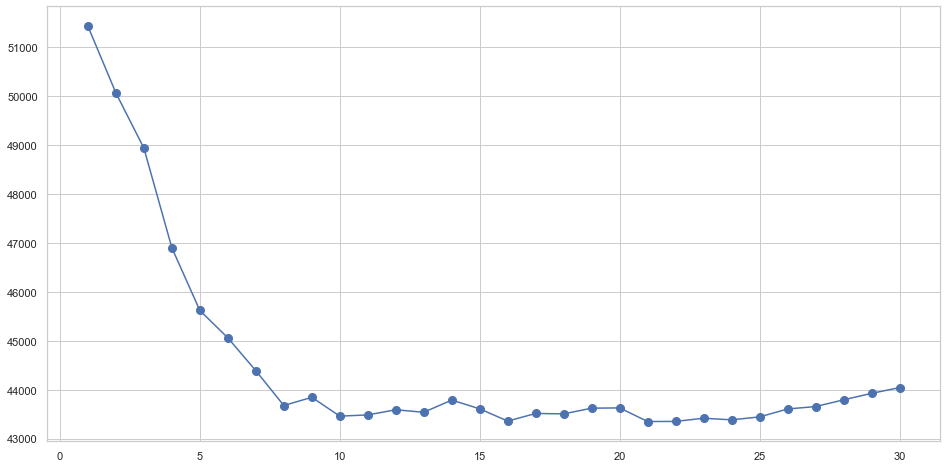

In [300]:
plt.figure(figsize=(16,8))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)

at n=10, rmse is very less so try n_neighbors=10 

In [303]:
knn_model  = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.7634609249827435

In [304]:
#do Prediction on Test Dataset

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.696153564543394

# Conclusion

after using eight M/L algorithm it's clear that Gradient Boosting giving the best accuracy so use it to predict the test data.

# New Future Prediction

Prediction Test Dataset

In [305]:
test_prediction = rdm_gb.predict(test)

In [306]:
pred = pd.DataFrame(test_prediction)
sub_df = pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub_df["Id"],pred],axis=1)
datasets.columns=["Id","SalePrice"]
datasets.to_csv("House_price_output.csv",index=False)